In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.io as sio
import copy
from evaluations import IGDC
"""
plt.rcParams.update({
                    "text.usetex": True,
                    'font.size' : 14,
                    'font.family' : 'serif',
                    'font.serif'  : 'Times New Roman'})"""

#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

'\nplt.rcParams.update({\n                    "text.usetex": True,\n                    \'font.size\' : 14,\n                    \'font.family\' : \'serif\',\n                    \'font.serif\'  : \'Times New Roman\'})'

In [138]:
path2 = "Results/Final/combined results/"

# 1) LastFM

In [153]:
path1 = "data/LastFM/"
path2 = "Results/Final/combined results/"

A = sio.loadmat(path1+'LastFM.mat')['A'].toarray()
F0 = sio.loadmat(path1+'LastFM.mat')['F'].flatten()
F =np.unique(F0, return_inverse=True)[1]
print(A)
print(F)
print(np.shape(A), np.shape(F))

F_lastFM = copy.deepcopy(F)

all_in_one = np.ones(len(F_lastFM))
uniqe_vals, count = np.unique(F_lastFM, return_counts=True)
lastFM_balance = min(count) / max(count)
print("Dataset balance = ", lastFM_balance)

all_competitor = pd.read_csv(path2 + "LastFM_all.csv")
#fair_nmf = pd.read_csv(path2 + "LastFM_k_lam_gridsearch_FNMTF.csv")
fair_nmf = pd.read_csv(path2 + "lfm_sort.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [lastFM_balance for i in range(len(k))]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 1 5 ... 3 0 5]
(5576, 5576) (5576,)
Dataset balance =  0.3302812295618051


## 1.1. Comparisons on $Q ~~ \text{and} ~~Balance$

C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\3130731995.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bh" (-> color='b'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\3130731995.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mv" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\3130731995.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mh" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7

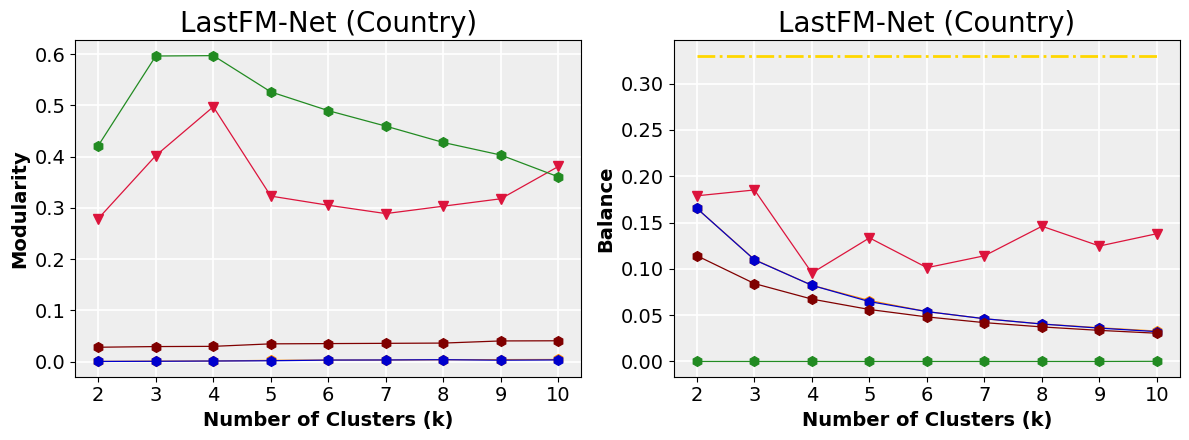

In [154]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#lmbd = [3.5, 80, 90-120, 90-110-120, 95-60, 65, 20, 75-20, 10-]
lmbd = [75, 120, 145, 120, 65, 35, 55, 40, 25]
#lmbd = [75, 120, 90, 110, 65, 35, 55, 40, 25]
lmbd = [75, 120, 120, 90, 65, 65, 55, 40, 25]

i_fnmtf_mod, i_fnmtf_bal = [],[]
for i,lam in enumerate(lmbd):
    cluster_rows = fair_nmf[fair_nmf['clusters (k)'] == i+2]
    i_fnmtf_mod.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["Q_FNMTF"].values )
    i_fnmtf_bal.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["B_FNMTF"].values )

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["B_FNMTF"].values
#df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
#i_fnmtf_mod = df["Q_FNMTF"].values
#i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k[0:9], g_sfsc_mod[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k[0:9], g_dmon_mod[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k[0:9], g_fsc_bal[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k[0:9], i_fnmtf_bal[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k[0:9], i_ifsc_bal[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k[0:9], g_sfsc_bal[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k[0:9], g_dmon_bal[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k[0:9], g_b[0:9], "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k[0:9])
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("LastFM-Net (Country)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("LastFM_new_plots.svg", format='svg')
plt.show()

## 1.2. Pareto Analysis and IGDC calculations

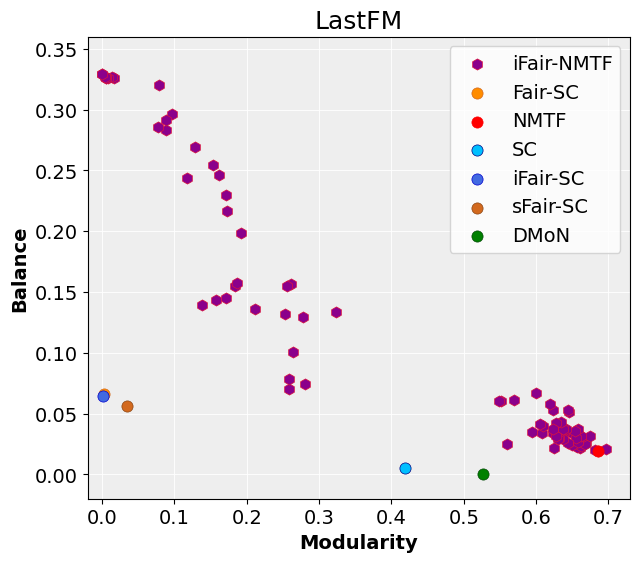

Average IGDC:
iFair_NMTF: 1.090188732801588
sFair-SC: 1.3500992742114013
Fair_SC: 1.3666490902132966
iFair-SC: 1.3680500714765251
DMoN: 1.1065835442102945
Minimum IGDC:
iFair_NMTF: 1.0118393398834078
sFair-SC: 1.3500992742114013
Fair_SC: 1.3666490902132966 
iFair-SC: 1.3680500714765251
DMoN: 1.1065835442102945
  network     attr      method  clusters (k)  avg-IGDC  min-IGDC
0  LastFM  Country  ifair_nmtf             5  1.090189  1.011839
1  LastFM  Country    sfair_sc             5  1.350099  1.350099
2  LastFM  Country     fair_sc             5  1.366649  1.366649
3  LastFM  Country    ifair_sc             5  1.368050  1.368050
4  LastFM  Country        dmon             5  1.106584  1.106584


network     attr      method  clusters (k)  avg-IGDC  min-IGDC
0  LastFM  Country  ifair_nmtf             5  1.090189  1.011839
1  LastFM  Country    sfair_sc             5  1.350099  1.350099
2  LastFM  Country     fair_sc             5  1.366649  1.366649
3  LastFM  Country    ifair_sc             5  1.368050  1.368050
4  LastFM  Country        dmon             5  1.106584  1.106584

In [155]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1
    
figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"LastFM", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="darkmagenta", linewidths = 0.5, marker ="h", edgecolor ="crimson",s = 65, label='iFair-NMTF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="darkorange", linewidths = 0.5, marker ="o", edgecolor ="chocolate",s = 65, label='Fair-SC', zorder=2)
plt.scatter(i_nmtf_mod[ind], i_nmtf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="red",s = 65, label='NMTF', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="deepskyblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(i_ifsc_mod[ind], i_ifsc_bal[ind], c ="royalblue", linewidths = 0.5, marker ="o", edgecolor ="mediumblue",s = 65, label='iFair-SC', zorder=2)
plt.scatter(g_sfsc_mod[ind], g_sfsc_bal[ind], c ="chocolate", linewidths = 0.5, marker ="o", edgecolor ="saddlebrown",s = 65, label='sFair-SC', zorder=2)
plt.scatter(g_dmon_mod[ind], g_dmon_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='DMoN', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.02, 0.73)
plt.ylim(-0.02, 0.36)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("LastFM.svg", format='svg')
plt.show()

igdc_avg_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'avg')
igdc_avg_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\niFair_NMTF: {igdc_avg_ifnmtf}\nsFair-SC: {igdc_avg_sfsc}\nFair_SC: {igdc_avg_fsc}\niFair-SC: {igdc_avg_ifsc}\nDMoN: {igdc_avg_dmon}")

igdc_min_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'min')
igdc_min_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\niFair_NMTF: {igdc_min_ifnmtf}\nsFair-SC: {igdc_min_sfsc}\nFair_SC: {igdc_min_fsc} \niFair-SC: {igdc_min_ifsc}\nDMoN: {igdc_min_dmon}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["LastFM" for i in range(5)]
col2 = ["Country" for i in range(5)]
col3 = ["ifair_nmtf", "sfair_sc", "fair_sc", "ifair_sc", "dmon"]
col4 = [num_c for i in range(5)]
col5 = [igdc_avg_ifnmtf, igdc_avg_sfsc, igdc_avg_fsc, igdc_avg_ifsc, igdc_avg_dmon]
col6 = [igdc_min_ifnmtf, igdc_min_sfsc, igdc_min_fsc, igdc_min_ifsc, igdc_min_dmon]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_LastFM_.csv', index=False)


## 1.3. Parameter ($\lambda$) analysis

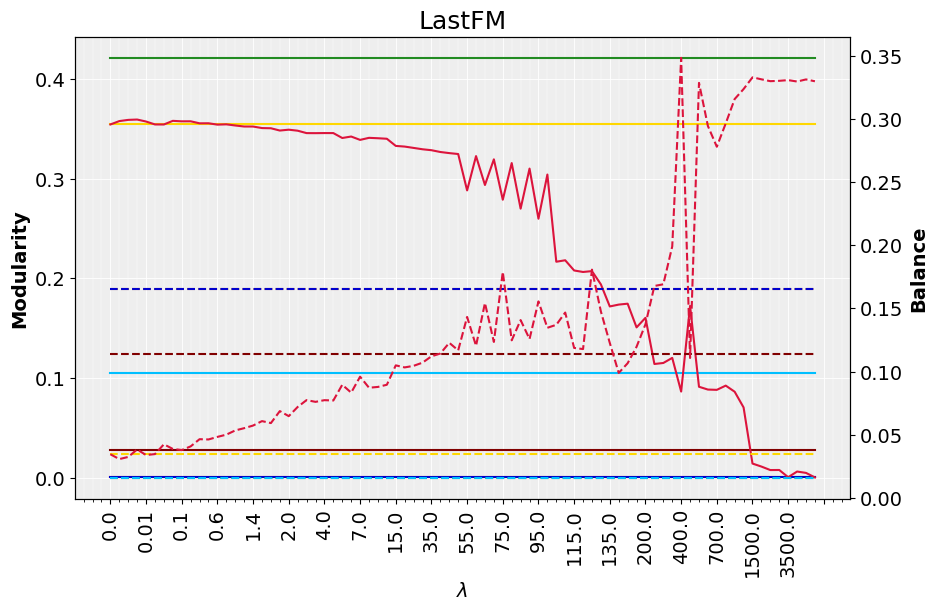

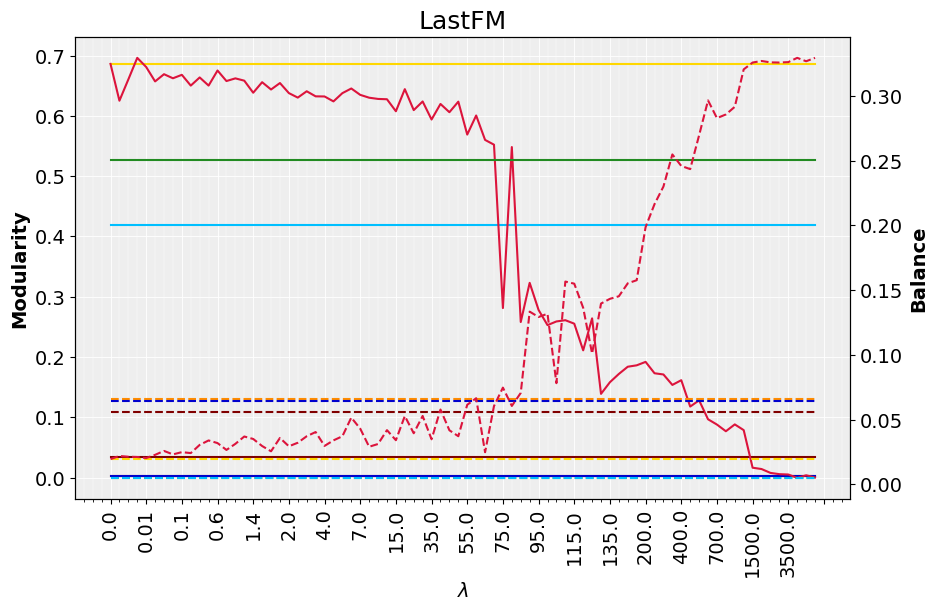

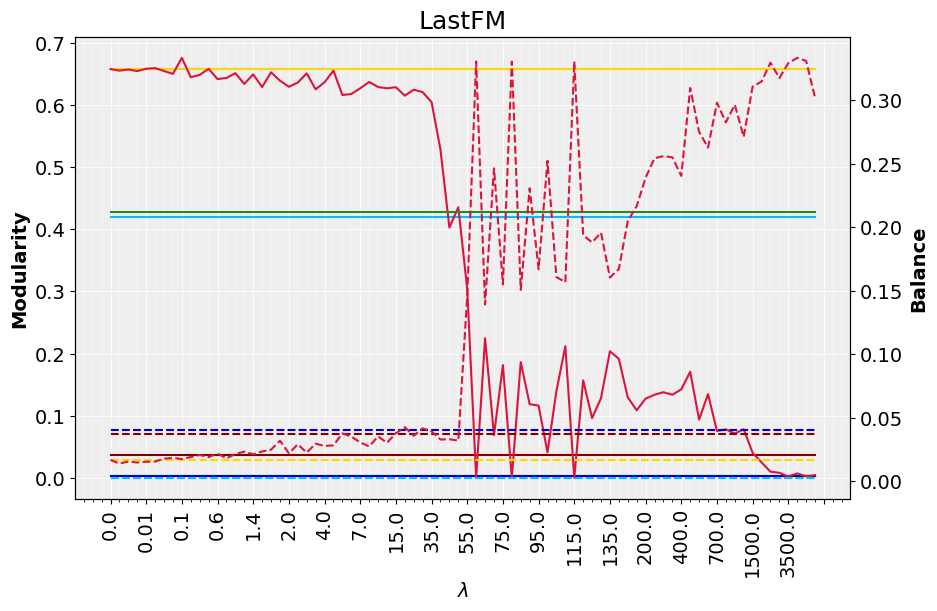

In [156]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"LastFM", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF modularity', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC modularity', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC modularity', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC modularity', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF modularity', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN modularity', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN balance', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("LastFM_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()


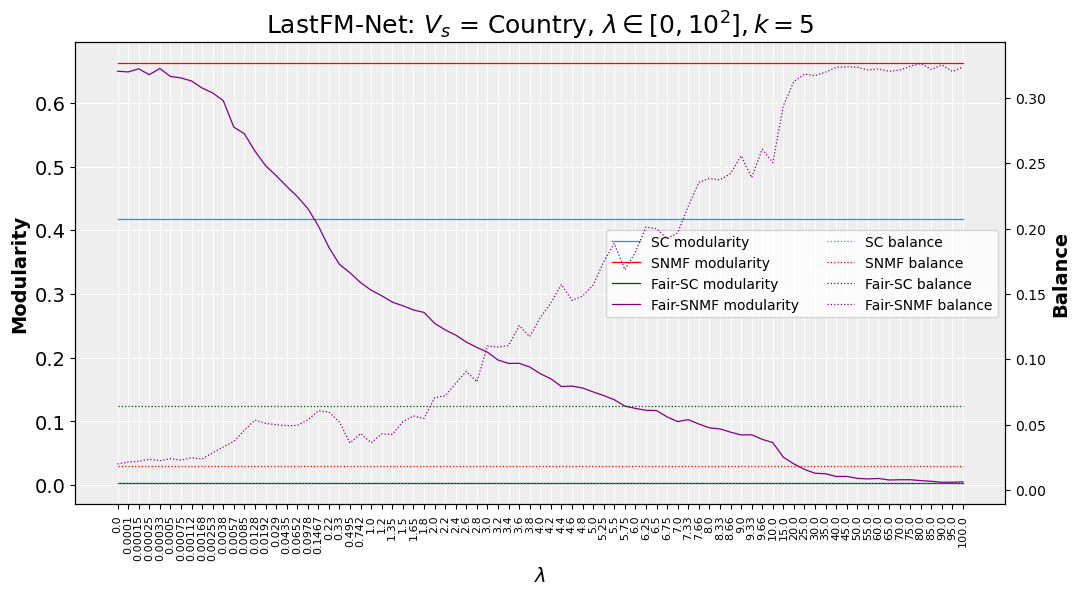

In [58]:
num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==2):
    ind = 0
elif(num_c==8):
    ind = 6
    
fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values
lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

x = np.arange(0, len(lam), 1)
tick_labs, ticks = [],[]
for i in x:
    if (np.mod(i,4)==0):
        tick_labs.append(lam[i])
        ticks.append(i)

figure, axis = plt.subplots(figsize=(12, 6))

axis.set_facecolor('#EEEEEE') #EBEBEB

sc_mod = np.repeat(g_sc_mod[ind], len(scatter_mod)) 
sc_bal = np.repeat(g_sc_bal[ind], len(scatter_mod)) 
fsc_mod = np.repeat(g_fsc_mod[ind], len(scatter_mod)) 
fsc_bal = np.repeat(g_fsc_bal[ind], len(scatter_mod)) 
nmf_mod = np.repeat(g_nmf_mod[ind], len(scatter_mod)) 
nmf_bal = np.repeat(g_nmf_bal[ind], len(scatter_mod)) 

# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

axis2=axis.twinx()

p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=0.9, c = "dodgerblue")
p2 = axis.plot(x, nmf_mod,  label='SNMF modularity', markersize=7, linewidth=0.9, c = "r")
p3 = axis.plot(x, fsc_mod,  label='FairSC modularity', markersize=7, linewidth=0.9, c = "#054907")
p4 = axis.plot(x, fnmf_mod, label='FairSNMF modularity', markersize=7, linewidth=0.9, c = "purple")

p5 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=0.9, linestyle = ":", c = "dodgerblue")
p6 = axis2.plot(x, nmf_bal, label='SNMF balance', markersize=7, linewidth=0.9, linestyle = ":", c = "r")
p7 = axis2.plot(x, fsc_bal, label='FairSC balance', markersize=7, linewidth=0.9, linestyle = ":", c = "#054907")
p8 = axis2.plot(x, fnmf_bal,label='FairSNMF balance', markersize=7, linewidth=0.9, linestyle = ":", c = "purple")

axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

axis.set_xticks(x)
axis.set_xticklabels(lam, rotation=90, fontsize = 8)

# added these three lines for aggregated legend 
plots = p1+p2+p3+p4+p5+p6+p7+p8
labels = [l.get_label() for l in plots]
axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
#plt.savefig("pareto_LastFM.svg", format='svg')
plt.show()


# 2) DrugNET_ethnicity

In [84]:
path1 = "data/DrugNet/CSV/"
path2 = "Results/Final/combined results/"

DrugNet_ethnicity_balance =  0.13761467889908258
DrugNet_gender_balance =     0.2671232876712329

all_competitor = pd.read_csv(path2 + "DrugNET_ethnicity_all.csv")
fair_nmf = pd.read_csv(path2 + "DrugNET_ethnicity_k_lam_gridsearch_FNMTF.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [DrugNet_ethnicity_balance for i in range(len(k))]

## 2.1. Comparisons on $Q ~~ \text{and} ~~Balance$

C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\4102918642.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bh" (-> color='b'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\4102918642.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mv" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\4102918642.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mh" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7

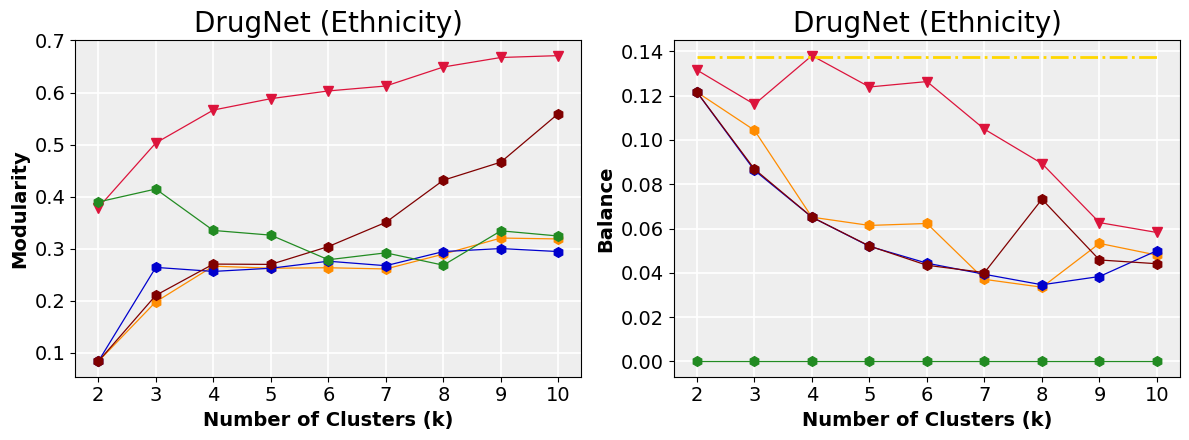

In [85]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#lmbd = [3.5, 1, 0.2, 1.2, 0.5, 0.01, 0.001, 1.5, 0.025]
lmbd = [3.5, 1, 0.2, 1.2, 0.5, 0.01, 0.001, 0.005, 0.025]

i_fnmtf_mod, i_fnmtf_bal = [],[]
for i,lam in enumerate(lmbd):
    cluster_rows = fair_nmf[fair_nmf['clusters (k)'] == i+2]
    i_fnmtf_mod.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["Q_FNMTF"].values )
    i_fnmtf_bal.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["B_FNMTF"].values )

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["B_FNMTF"].values
#df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
#i_fnmtf_mod = df["Q_FNMTF"].values
#i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k[0:9], g_sfsc_mod[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k[0:9], g_dmon_mod[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k[0:9], g_fsc_bal[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k[0:9], i_fnmtf_bal[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k[0:9], i_ifsc_bal[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k[0:9], g_sfsc_bal[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k[0:9], g_dmon_bal[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k[0:9], g_b[0:9], "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k[0:9])
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("DrugNet (Ethnicity)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("DrugNet_ethnicity_new_plots.svg", format='svg')
plt.show()

## 2.2. Parameter ($\lambda$) analysis

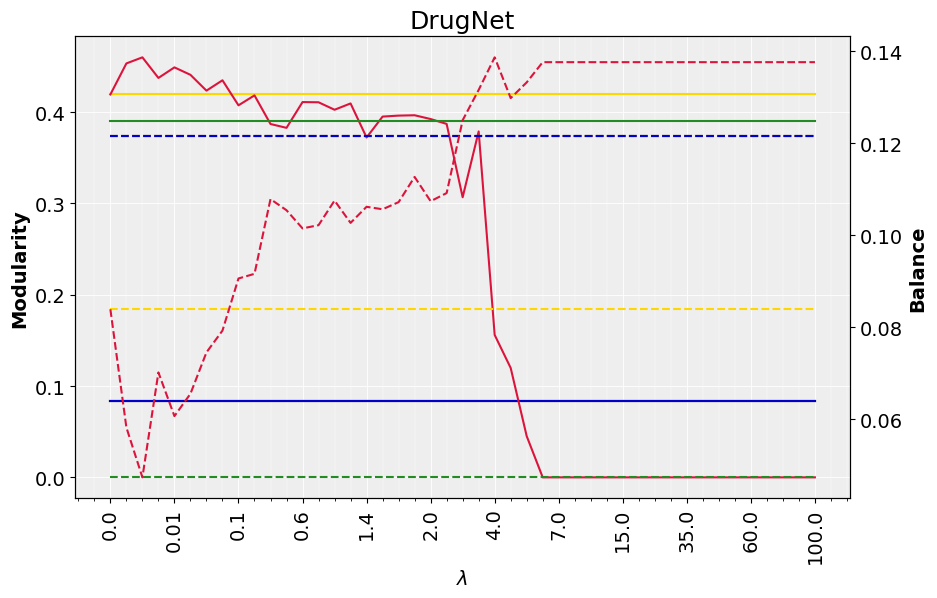

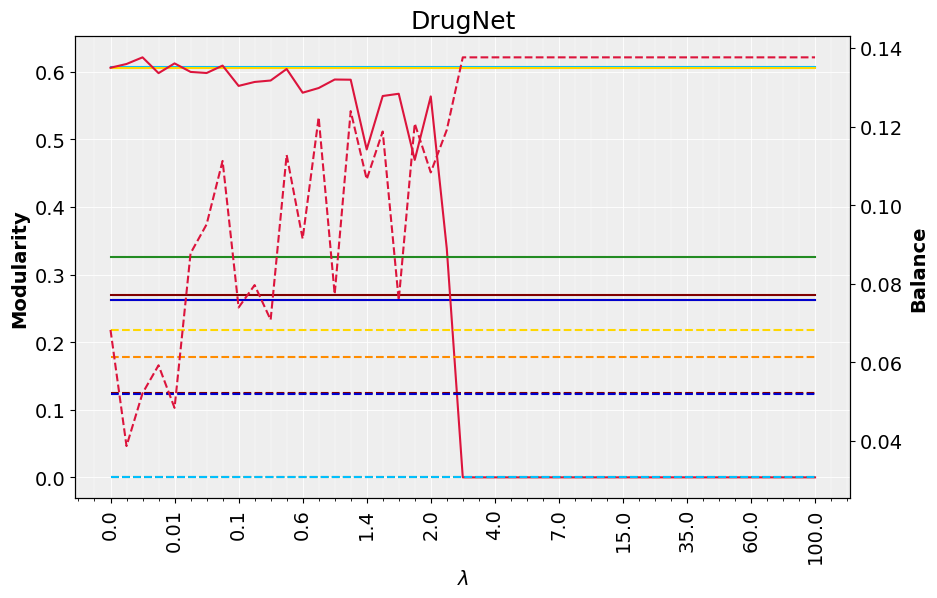

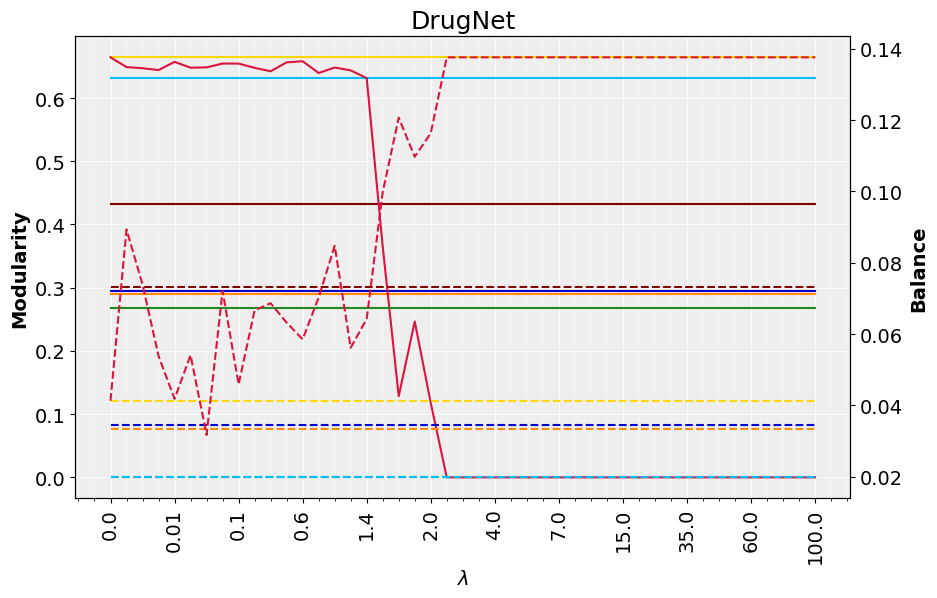

In [86]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"DrugNet", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF modularity', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC modularity', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC modularity', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC modularity', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF modularity', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN modularity', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN balance', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("DrugNet_ethnicity_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()

## 2.3. Pareto Analysis and IGDC calculations

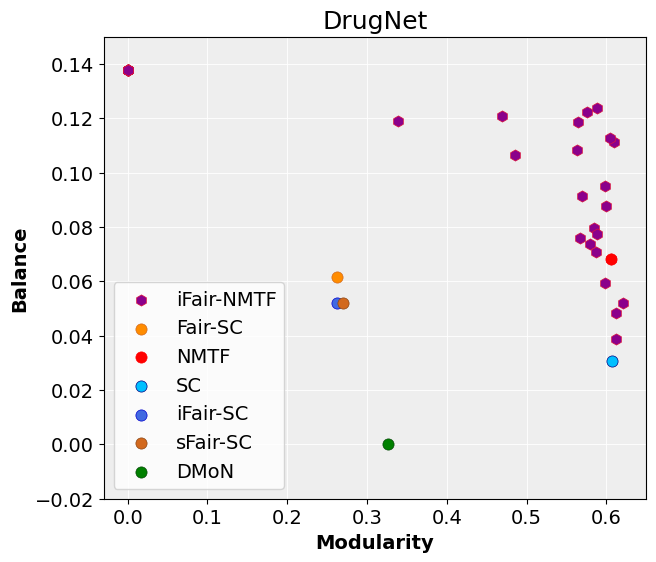

Average IGDC:
iFair_NMTF: 1.1684241134412472
sFair-SC: 1.1963978855708617
Fair_SC: 1.1935987017836698
iFair-SC: 1.2010318028112656
DMoN: 1.20583708766288
Minimum IGDC:
iFair_NMTF: 0.9680445908815303
sFair-SC: 1.1963978855708617
Fair_SC: 1.1935987017836698 
iFair-SC: 1.2010318028112656
DMoN: 1.20583708766288
   network     attr      method  clusters (k)  avg-IGDC  min-IGDC
0  DrugNet  Country  ifair_nmtf             5  1.168424  0.968045
1  DrugNet  Country    sfair_sc             5  1.196398  1.196398
2  DrugNet  Country     fair_sc             5  1.193599  1.193599
3  DrugNet  Country    ifair_sc             5  1.201032  1.201032
4  DrugNet  Country        dmon             5  1.205837  1.205837


network     attr      method  clusters (k)  avg-IGDC  min-IGDC
0  DrugNet  Country  ifair_nmtf             5  1.168424  0.968045
1  DrugNet  Country    sfair_sc             5  1.196398  1.196398
2  DrugNet  Country     fair_sc             5  1.193599  1.193599
3  DrugNet  Country    ifair_sc             5  1.201032  1.201032
4  DrugNet  Country        dmon             5  1.205837  1.205837

In [30]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1
    
figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"DrugNet", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="darkmagenta", linewidths = 0.5, marker ="h", edgecolor ="crimson",s = 65, label='iFair-NMTF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="darkorange", linewidths = 0.5, marker ="o", edgecolor ="chocolate",s = 65, label='Fair-SC', zorder=2)
plt.scatter(i_nmtf_mod[ind], i_nmtf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="red",s = 65, label='NMTF', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="deepskyblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(i_ifsc_mod[ind], i_ifsc_bal[ind], c ="royalblue", linewidths = 0.5, marker ="o", edgecolor ="mediumblue",s = 65, label='iFair-SC', zorder=2)
plt.scatter(g_sfsc_mod[ind], g_sfsc_bal[ind], c ="chocolate", linewidths = 0.5, marker ="o", edgecolor ="saddlebrown",s = 65, label='sFair-SC', zorder=2)
plt.scatter(g_dmon_mod[ind], g_dmon_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='DMoN', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.03, 0.65)
plt.ylim(-0.02, 0.15)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_DrugNet.svg", format='svg')
plt.show()

igdc_avg_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'avg')
igdc_avg_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\niFair_NMTF: {igdc_avg_ifnmtf}\nsFair-SC: {igdc_avg_sfsc}\nFair_SC: {igdc_avg_fsc}\niFair-SC: {igdc_avg_ifsc}\nDMoN: {igdc_avg_dmon}")

igdc_min_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'min')
igdc_min_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\niFair_NMTF: {igdc_min_ifnmtf}\nsFair-SC: {igdc_min_sfsc}\nFair_SC: {igdc_min_fsc} \niFair-SC: {igdc_min_ifsc}\nDMoN: {igdc_min_dmon}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["DrugNet" for i in range(5)]
col2 = ["Country" for i in range(5)]
col3 = ["ifair_nmtf", "sfair_sc", "fair_sc", "ifair_sc", "dmon"]
col4 = [num_c for i in range(5)]
col5 = [igdc_avg_ifnmtf, igdc_avg_sfsc, igdc_avg_fsc, igdc_avg_ifsc, igdc_avg_dmon]
col6 = [igdc_min_ifnmtf, igdc_min_sfsc, igdc_min_fsc, igdc_min_ifsc, igdc_min_dmon]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_DrugNet_ethnicity_.csv', index=False)


# 3) DrugNET_gender

In [253]:
path1 = "data/DrugNet/CSV/"
path2 = "Results/Final/combined results/"

DrugNet_ethnicity_balance =  0.13761467889908258
DrugNet_gender_balance =     0.2671232876712329

all_competitor = pd.read_csv(path2 + "DrugNET_gender.csv")
fair_nmf = pd.read_csv(path2 + "DrugNET_gender_k_lam_gridsearch.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [DrugNet_gender_balance for i in range(len(k))]

## 3.1. Comparisons on $Q ~~ \text{and} ~~Balance$

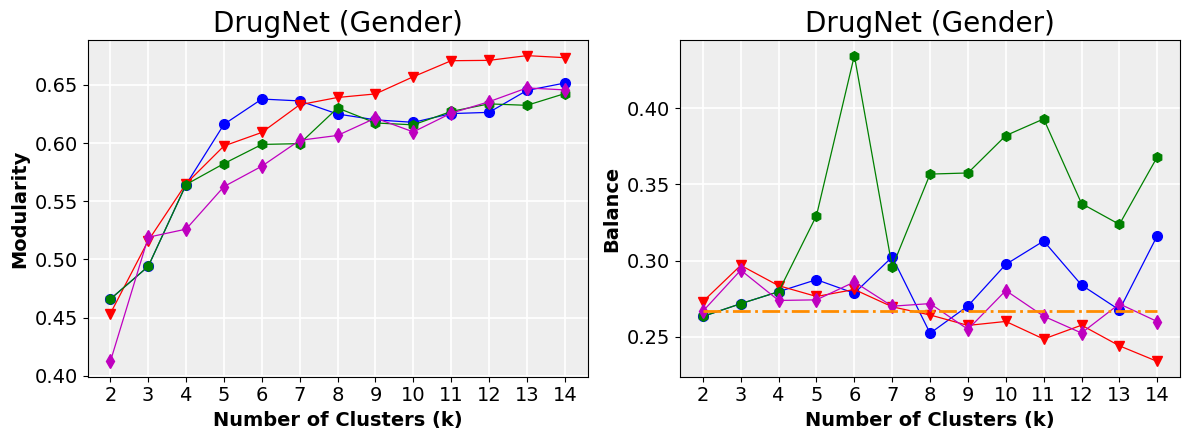

In [254]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.9)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.9)]["B_FNMTF"].values
df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
i_fnmtf_mod = df["Q_FNMTF"].values
i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fsc_mod, styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k, i_fnmtf_mod, styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k, i_ifsc_mod, styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k, g_sfsc_mod, styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k, g_dmon_mod, styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fsc_bal, styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k, i_fnmtf_bal, styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k, i_ifsc_bal, styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k, g_sfsc_bal, styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k, g_dmon_bal, styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k, g_b, "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k)
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("DrugNet (Gender)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("DrugNet_gender_new_plots.svg", format='svg')
plt.show()

## 3.2. Parameter ($\lambda$) analysis

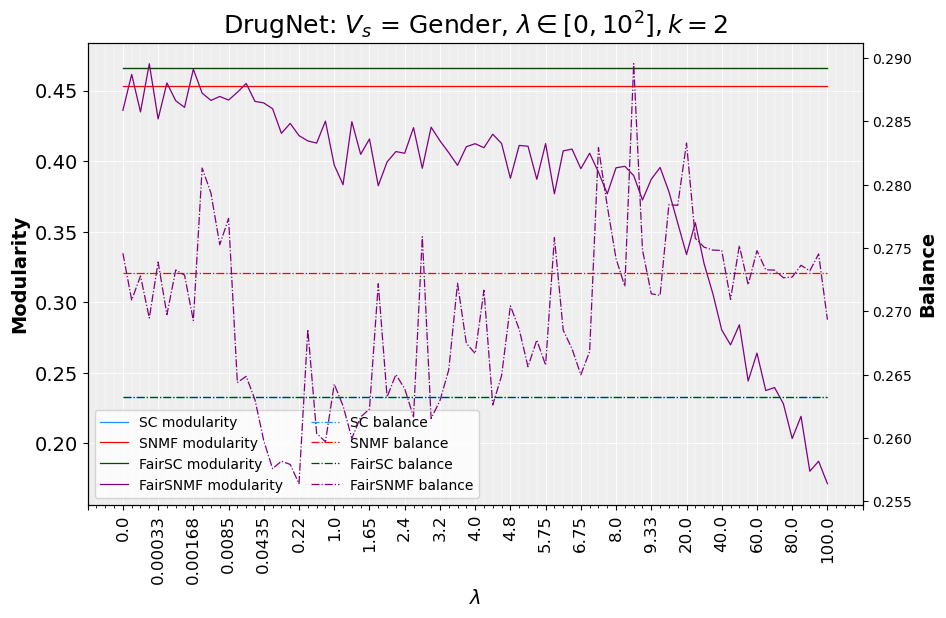

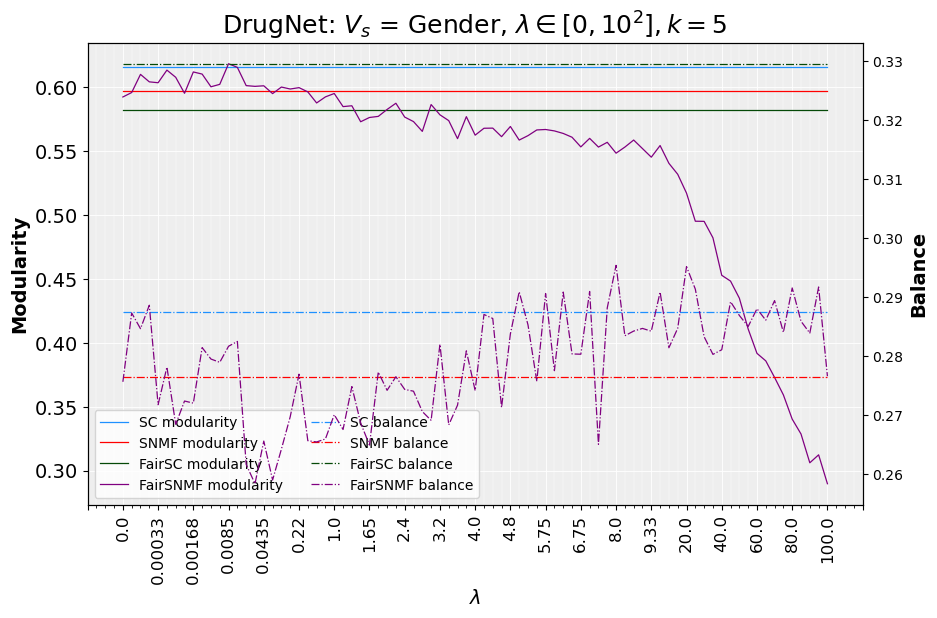

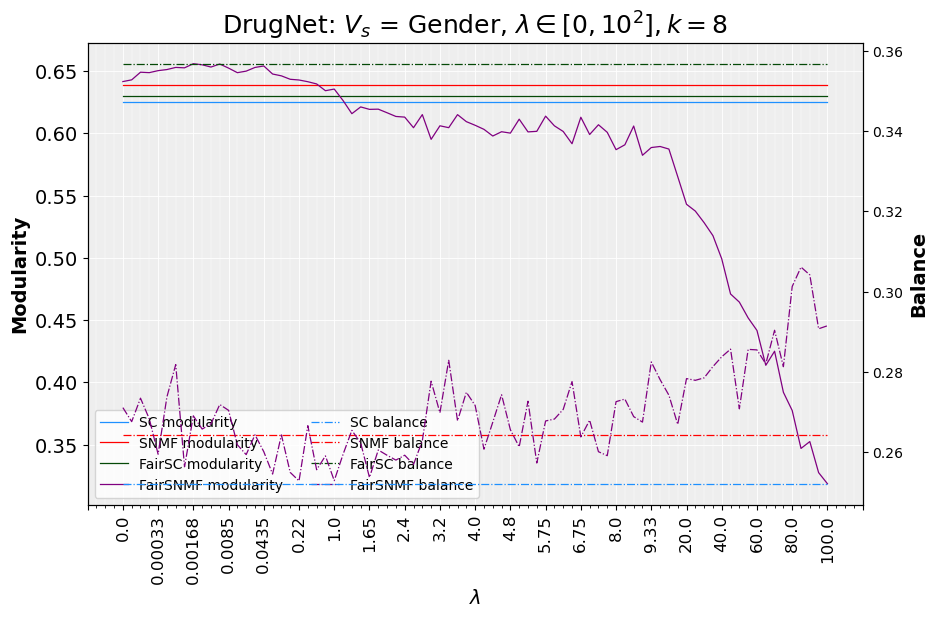

In [78]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sc_mod = np.repeat(g_sc_mod[ind], len(scatter_mod)) 
    sc_bal = np.repeat(g_sc_bal[ind], len(scatter_mod)) 
    fsc_mod = np.repeat(g_fsc_mod[ind], len(scatter_mod)) 
    fsc_bal = np.repeat(g_fsc_bal[ind], len(scatter_mod)) 
    nmf_mod = np.repeat(g_nmf_mod[ind], len(scatter_mod)) 
    nmf_bal = np.repeat(g_nmf_bal[ind], len(scatter_mod)) 

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"DrugNet: $V_s$ = Gender, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14)

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=0.9, c = "dodgerblue")
    p2 = axis.plot(x, nmf_mod,  label='SNMF modularity', markersize=7, linewidth=0.9, c = "r")
    p3 = axis.plot(x, fsc_mod,  label='FairSC modularity', markersize=7, linewidth=0.9, c = "#054907")
    p4 = axis.plot(x, fnmf_mod, label='FairSNMF modularity', markersize=7, linewidth=0.9, c = "purple")

    p5 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=0.9, linestyle = "-.", c = "dodgerblue")
    p6 = axis2.plot(x, nmf_bal, label='SNMF balance', markersize=7, linewidth=0.9, linestyle = "-.", c = "r")
    p7 = axis2.plot(x, fsc_bal, label='FairSC balance', markersize=7, linewidth=0.9, linestyle = "-.", c = "#054907")
    p8 = axis2.plot(x, fnmf_bal,label='FairSNMF balance', markersize=7, linewidth=0.9, linestyle = "-.", c = "purple")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 12)

    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend 
    plots = p1+p2+p3+p4+p5+p6+p7+p8
    labels = [l.get_label() for l in plots]
    axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("DrugNet_gender_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()

## 3.3. Pareto Analysis and IGDC calculations

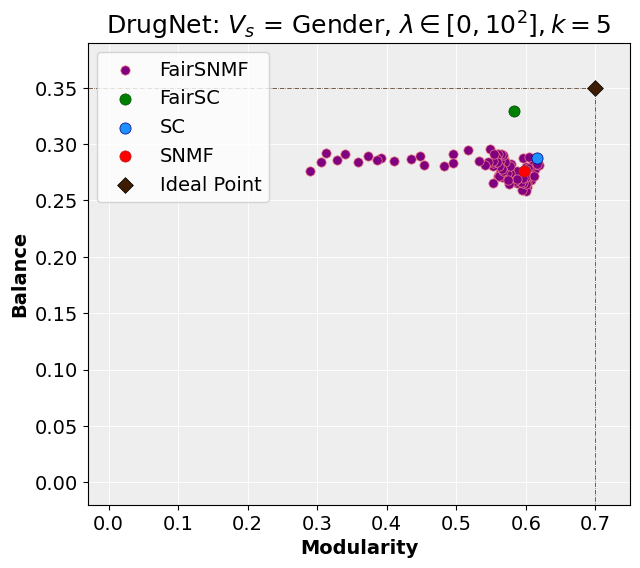

Average IGDC:
Fair_NMF: 0.17604305700809456
NMF: 0.126155907007705
Fair_SC: 0.11935782281055157
SC: 0.10462679113314681
Minimum IGDC:
Fair_NMF: 0.10629842404943707
NMF: 0.126155907007705
Fair_SC: 0.11935782281055157
SC: 0.10462679113314681
   network    attr       method  clusters (k)  avg-IGDC  min-IGDC
0  DrugNet  Gender     fair_nmf             5  0.176043  0.106298
1  DrugNet  Gender      fair_sc             5  0.119358  0.119358
2  DrugNet  Gender  vanilla_nmf             5  0.126156  0.126156
3  DrugNet  Gender   vanilla_sc             5  0.104627  0.104627


network    attr       method  clusters (k)  avg-IGDC  min-IGDC
0  DrugNet  Gender     fair_nmf             5  0.176043  0.106298
1  DrugNet  Gender      fair_sc             5  0.119358  0.119358
2  DrugNet  Gender  vanilla_nmf             5  0.126156  0.126156
3  DrugNet  Gender   vanilla_sc             5  0.104627  0.104627

In [79]:
ideal = np.asarray([0.70, 0.35])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1
    
figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['modularity'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['average balance'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
axis.set_title(r"DrugNet: $V_s$ = Gender, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="purple", linewidths = 0.5, marker ="o", edgecolor ="lightcoral",s = 45, label='FairSNMF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='FairSC', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="dodgerblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(g_nmf_mod[ind], g_nmf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="firebrick",s = 65, label='SNMF', zorder=2)
plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')
plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.03, 0.75)
plt.ylim(-0.02, 0.39)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_DrugNet_gender.svg", format='svg')
plt.show()

igdc_avg_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\nFair_NMF: {igdc_avg_fnmf}\nNMF: {igdc_avg_nmf}\nFair_SC: {igdc_avg_fsc}\nSC: {igdc_avg_sc}")

igdc_min_fnmf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_nmf  = IGDC(np.asarray([g_nmf_mod[ind], g_nmf_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_sc   = IGDC(np.asarray([g_sc_mod[ind], g_sc_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\nFair_NMF: {igdc_min_fnmf}\nNMF: {igdc_min_nmf}\nFair_SC: {igdc_min_fsc}\nSC: {igdc_min_sc}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["DrugNet" for i in range(4)]
col2 = ["Gender" for i in range(4)]
col3 = ["fair_nmf", "fair_sc", "vanilla_nmf", "vanilla_sc"]
col4 = [num_c for i in range(4)]
col5 = [igdc_avg_fnmf, igdc_avg_fsc, igdc_avg_nmf, igdc_avg_sc]
col6 = [igdc_min_fnmf, igdc_min_fsc, igdc_min_nmf, igdc_min_sc]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_DrugNet_gender_.csv', index=False)


# 4) Contact Diaries

In [87]:
path1 = "data/School/"
path2 = "Results/Final/combined results/"

Diaries_balance =  0.7647058823529411

all_competitor = pd.read_csv(path2 + "Diaries_all.csv")
fair_nmf = pd.read_csv(path2 + "Diaries_k_lam_gridsearch_FNMTF.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [Diaries_balance for i in range(len(k))]

## 4.1. Comparisons on $Q ~~ \text{and} ~~Balance$

C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\214976164.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bh" (-> color='b'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\214976164.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mv" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\214976164.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mh" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, l

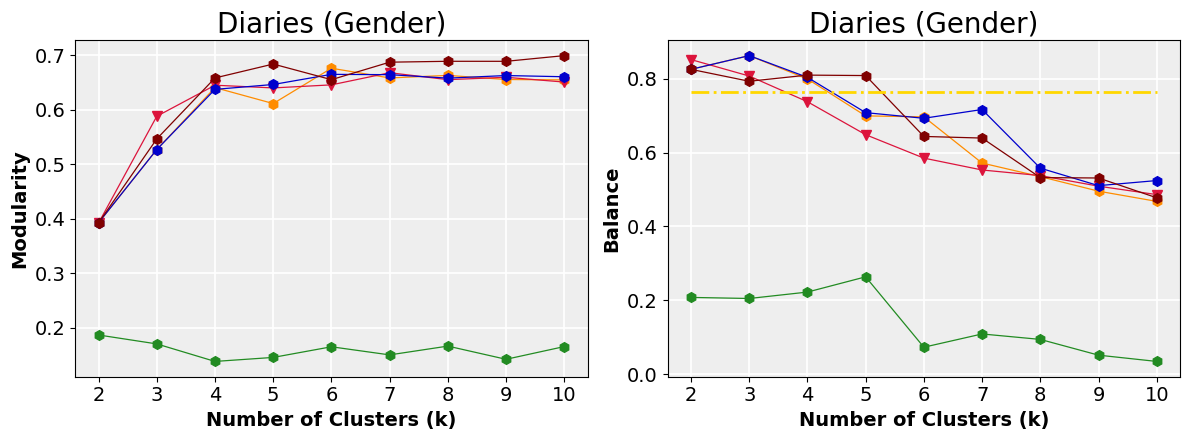

In [88]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#lmbd = [0.1, 4, 4, 3.5, 5, 2, 0.8, 1.4, 1.6]
lmbd = [0.1, 4, 4, 3.5, 4, 2, 0.8, 0.2, 1.6]

i_fnmtf_mod, i_fnmtf_bal = [],[]
for i,lam in enumerate(lmbd):
    cluster_rows = fair_nmf[fair_nmf['clusters (k)'] == i+2]
    i_fnmtf_mod.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["Q_FNMTF"].values )
    i_fnmtf_bal.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["B_FNMTF"].values )

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["B_FNMTF"].values
#df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
#i_fnmtf_mod = df["Q_FNMTF"].values
#i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k[0:9], g_sfsc_mod[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k[0:9], g_dmon_mod[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k[0:9], g_fsc_bal[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k[0:9], i_fnmtf_bal[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k[0:9], i_ifsc_bal[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k[0:9], g_sfsc_bal[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k[0:9], g_dmon_bal[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k[0:9], g_b[0:9], "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k[0:9])
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("Diaries (Gender)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("Diaries_new_plots.svg", format='svg')
plt.show()

## 4.2. Parameter ($\lambda$) analysis

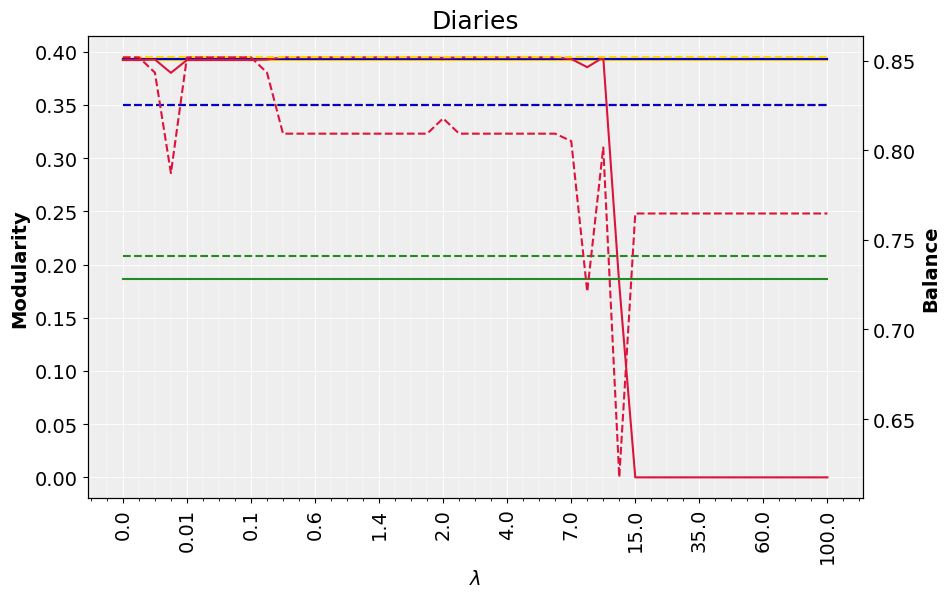

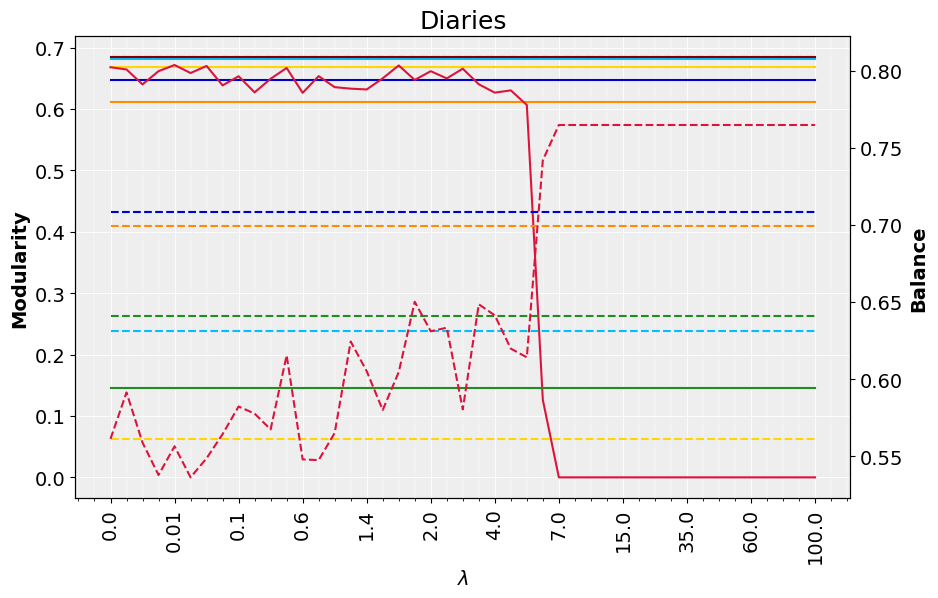

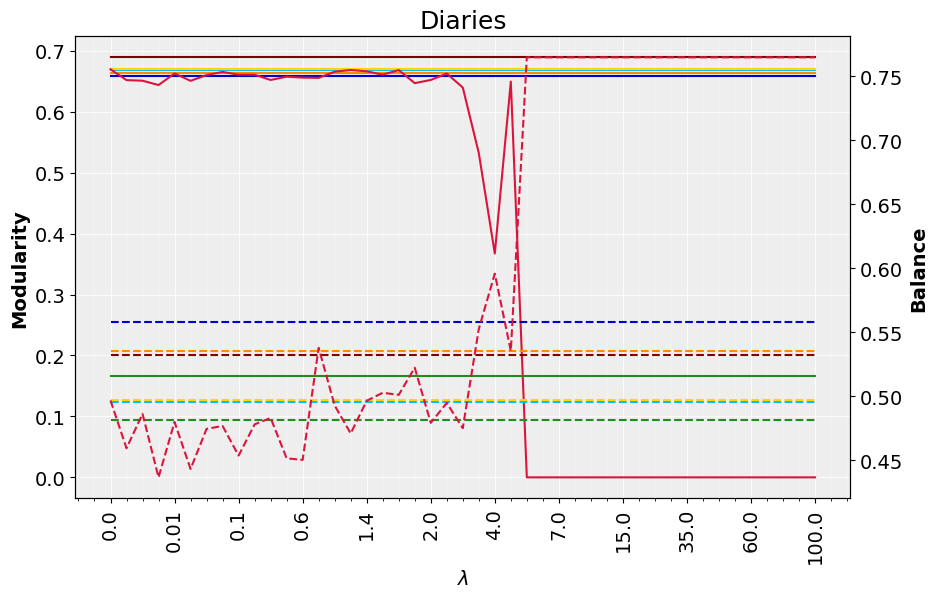

In [89]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6
    
    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"Diaries", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF modularity', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC modularity', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC modularity', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC modularity', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF modularity', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN modularity', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN balance', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("Diaries_ethnicity_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()

## 4.3. Pareto Analysis and IGDC calculations

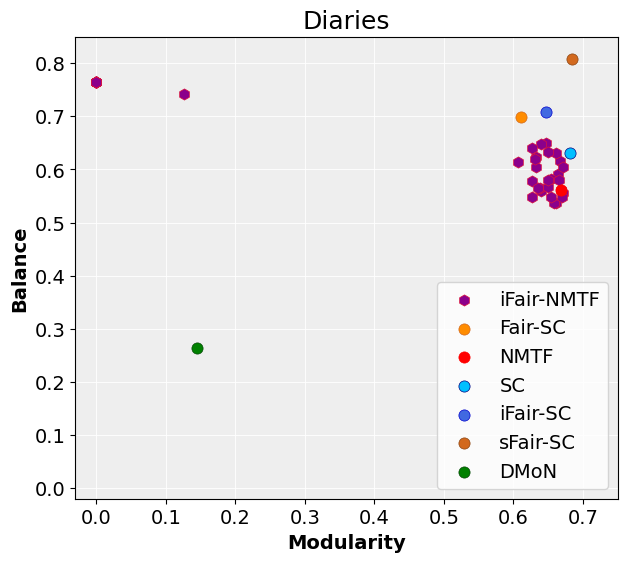

Average IGDC:
iFair_NMTF: 0.7337036929739356
sFair-SC: 0.36938005854509104
Fair_SC: 0.49119929597601414
iFair-SC: 0.4583972827142833
DMoN: 1.1281192813002832
Minimum IGDC:
iFair_NMTF: 0.4968543608238919
sFair-SC: 0.36938005854509104
Fair_SC: 0.49119929597601414 
iFair-SC: 0.4583972827142833
DMoN: 1.1281192813002832
   network    attr      method  clusters (k)  avg-IGDC  min-IGDC
0  Diaries  Gender  ifair_nmtf             5  0.733704  0.496854
1  Diaries  Gender    sfair_sc             5  0.369380  0.369380
2  Diaries  Gender     fair_sc             5  0.491199  0.491199
3  Diaries  Gender    ifair_sc             5  0.458397  0.458397
4  Diaries  Gender        dmon             5  1.128119  1.128119


network    attr      method  clusters (k)  avg-IGDC  min-IGDC
0  Diaries  Gender  ifair_nmtf             5  0.733704  0.496854
1  Diaries  Gender    sfair_sc             5  0.369380  0.369380
2  Diaries  Gender     fair_sc             5  0.491199  0.491199
3  Diaries  Gender    ifair_sc             5  0.458397  0.458397
4  Diaries  Gender        dmon             5  1.128119  1.128119

In [40]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1

figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"Diaries", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="darkmagenta", linewidths = 0.5, marker ="h", edgecolor ="crimson",s = 65, label='iFair-NMTF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="darkorange", linewidths = 0.5, marker ="o", edgecolor ="chocolate",s = 65, label='Fair-SC', zorder=2)
plt.scatter(i_nmtf_mod[ind], i_nmtf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="red",s = 65, label='NMTF', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="deepskyblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(i_ifsc_mod[ind], i_ifsc_bal[ind], c ="royalblue", linewidths = 0.5, marker ="o", edgecolor ="mediumblue",s = 65, label='iFair-SC', zorder=2)
plt.scatter(g_sfsc_mod[ind], g_sfsc_bal[ind], c ="chocolate", linewidths = 0.5, marker ="o", edgecolor ="saddlebrown",s = 65, label='sFair-SC', zorder=2)
plt.scatter(g_dmon_mod[ind], g_dmon_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='DMoN', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.03, 0.75)
plt.ylim(-0.02, 0.85)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_Diaries.svg", format='svg')
plt.show()

igdc_avg_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'avg')
igdc_avg_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\niFair_NMTF: {igdc_avg_ifnmtf}\nsFair-SC: {igdc_avg_sfsc}\nFair_SC: {igdc_avg_fsc}\niFair-SC: {igdc_avg_ifsc}\nDMoN: {igdc_avg_dmon}")

igdc_min_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'min')
igdc_min_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\niFair_NMTF: {igdc_min_ifnmtf}\nsFair-SC: {igdc_min_sfsc}\nFair_SC: {igdc_min_fsc} \niFair-SC: {igdc_min_ifsc}\nDMoN: {igdc_min_dmon}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["Diaries" for i in range(5)]
col2 = ["Gender" for i in range(5)]
col3 = ["ifair_nmtf", "sfair_sc", "fair_sc", "ifair_sc", "dmon"]
col4 = [num_c for i in range(5)]
col5 = [igdc_avg_ifnmtf, igdc_avg_sfsc, igdc_avg_fsc, igdc_avg_ifsc, igdc_avg_dmon]
col6 = [igdc_min_ifnmtf, igdc_min_sfsc, igdc_min_fsc, igdc_min_ifsc, igdc_min_dmon]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_Diaries_.csv', index=False)


# 5) Facebook

In [90]:
path1 = "data/School/"
path2 = "Results/Final/combined results/"

Facebook_balance =  0.8235294117647058

all_competitor = pd.read_csv(path2 + "Facebook_all.csv")
fair_nmf = pd.read_csv(path2 + "Facebook_k_lam_gridsearch_FNMTF.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [Facebook_balance for i in range(len(k))]

## 5.1. Comparisons on $Q ~~ \text{and} ~~Balance$

C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\4082202844.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bh" (-> color='b'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\4082202844.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mv" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\4082202844.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mh" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7

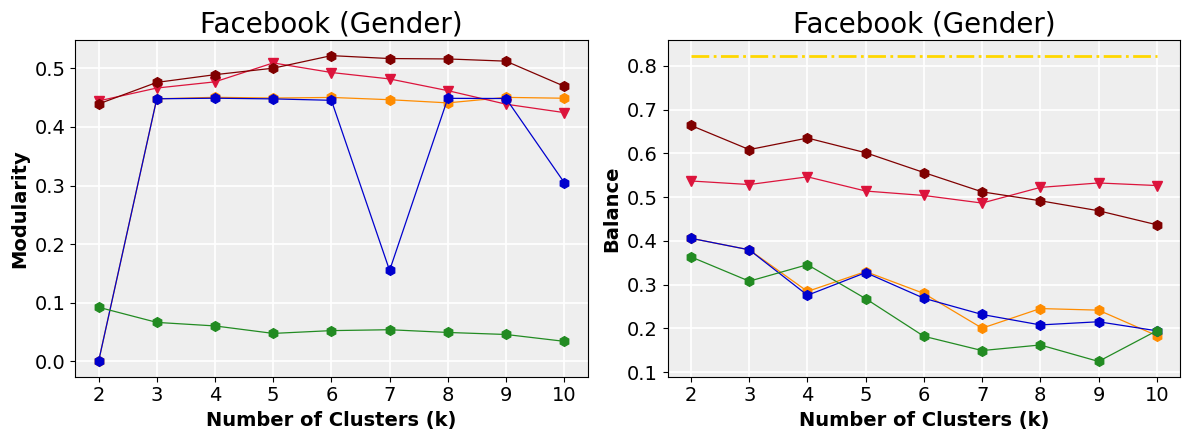

In [91]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#lmbd = [0.1, 4, 4, 3.5, 5, 2, 0.8, 1.4, 1.6]
lmbd = [100, 35, 70, 40, 1.6, 3.5, 0.4, 0.075, 0.0075]

i_fnmtf_mod, i_fnmtf_bal = [],[]
for i,lam in enumerate(lmbd):
    cluster_rows = fair_nmf[fair_nmf['clusters (k)'] == i+2]
    i_fnmtf_mod.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["Q_FNMTF"].values )
    i_fnmtf_bal.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["B_FNMTF"].values )

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["B_FNMTF"].values
#df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
#i_fnmtf_mod = df["Q_FNMTF"].values
#i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k[0:9], g_sfsc_mod[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k[0:9], g_dmon_mod[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k[0:9], g_fsc_bal[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k[0:9], i_fnmtf_bal[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k[0:9], i_ifsc_bal[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k[0:9], g_sfsc_bal[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k[0:9], g_dmon_bal[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k[0:9], g_b[0:9], "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k[0:9])
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("Facebook (Gender)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("Facebook_new_plots.svg", format='svg')
plt.show()

## 5.2. Parameter ($\lambda$) analysis

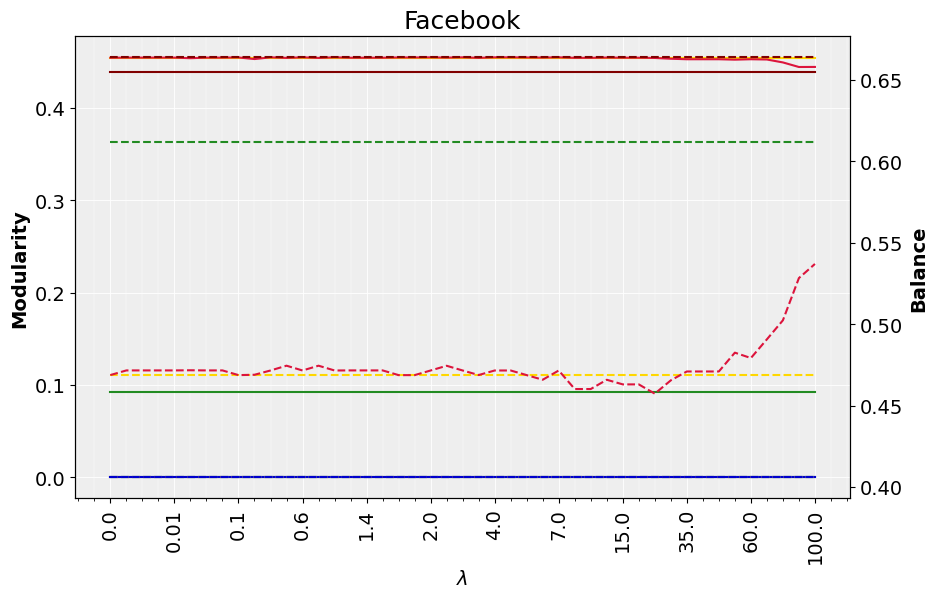

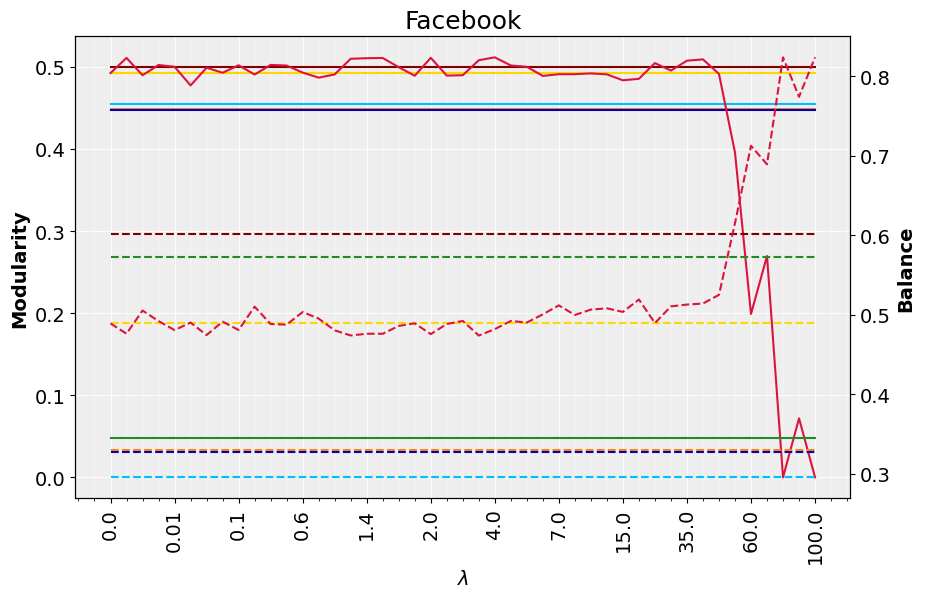

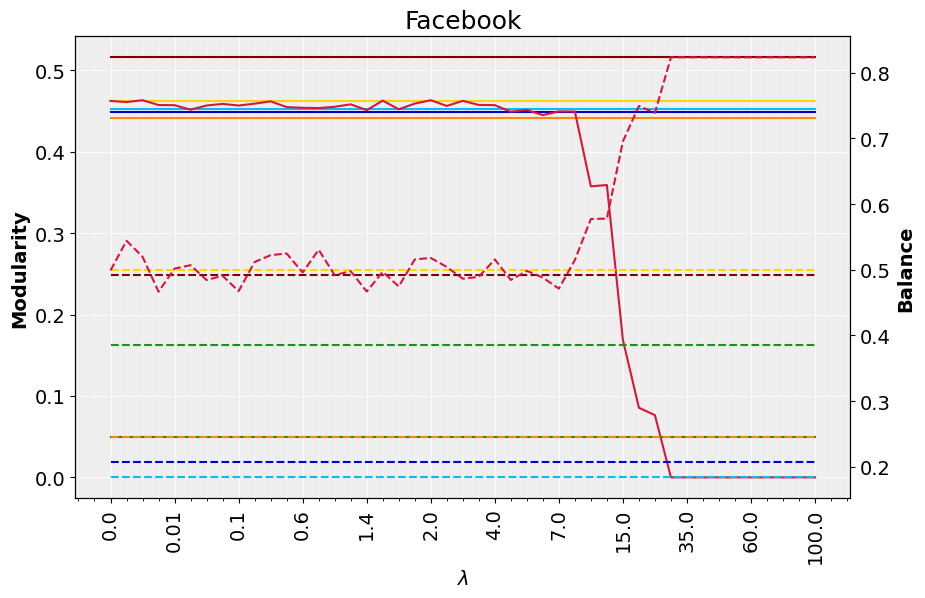

In [92]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6

    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"Facebook", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF modularity', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC modularity', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC modularity', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC modularity', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF modularity', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN modularity', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN balance', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("Facebook_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()

## 5.3. Pareto Analysis and IGDC calculations

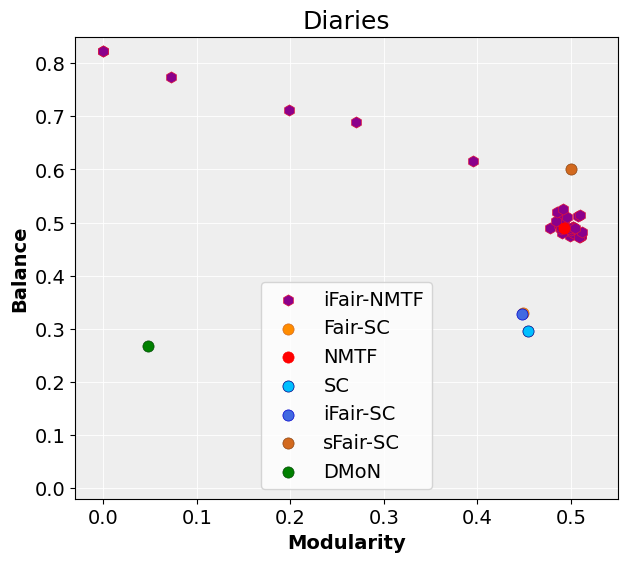

Average IGDC:
iFair_NMTF: 0.73760268492671
sFair-SC: 0.6393068002726034
Fair_SC: 0.8674401327421412
iFair-SC: 0.8702179203158087
DMoN: 1.2011267374163492
Minimum IGDC:
iFair_NMTF: 0.6908273491079481
sFair-SC: 0.6393068002726034
Fair_SC: 0.8674401327421412 
iFair-SC: 0.8702179203158087
DMoN: 1.2011267374163492
    network    attr      method  clusters (k)  avg-IGDC  min-IGDC
0  Facebook  Gender  ifair_nmtf             5  0.737603  0.690827
1  Facebook  Gender    sfair_sc             5  0.639307  0.639307
2  Facebook  Gender     fair_sc             5  0.867440  0.867440
3  Facebook  Gender    ifair_sc             5  0.870218  0.870218
4  Facebook  Gender        dmon             5  1.201127  1.201127


network    attr      method  clusters (k)  avg-IGDC  min-IGDC
0  Facebook  Gender  ifair_nmtf             5  0.737603  0.690827
1  Facebook  Gender    sfair_sc             5  0.639307  0.639307
2  Facebook  Gender     fair_sc             5  0.867440  0.867440
3  Facebook  Gender    ifair_sc             5  0.870218  0.870218
4  Facebook  Gender        dmon             5  1.201127  1.201127

In [47]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1

figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"Diaries", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="darkmagenta", linewidths = 0.5, marker ="h", edgecolor ="crimson",s = 65, label='iFair-NMTF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="darkorange", linewidths = 0.5, marker ="o", edgecolor ="chocolate",s = 65, label='Fair-SC', zorder=2)
plt.scatter(i_nmtf_mod[ind], i_nmtf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="red",s = 65, label='NMTF', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="deepskyblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(i_ifsc_mod[ind], i_ifsc_bal[ind], c ="royalblue", linewidths = 0.5, marker ="o", edgecolor ="mediumblue",s = 65, label='iFair-SC', zorder=2)
plt.scatter(g_sfsc_mod[ind], g_sfsc_bal[ind], c ="chocolate", linewidths = 0.5, marker ="o", edgecolor ="saddlebrown",s = 65, label='sFair-SC', zorder=2)
plt.scatter(g_dmon_mod[ind], g_dmon_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='DMoN', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.03, 0.55)
plt.ylim(-0.02, 0.85)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_Facebook.svg", format='svg')
plt.show()

igdc_avg_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'avg')
igdc_avg_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\niFair_NMTF: {igdc_avg_ifnmtf}\nsFair-SC: {igdc_avg_sfsc}\nFair_SC: {igdc_avg_fsc}\niFair-SC: {igdc_avg_ifsc}\nDMoN: {igdc_avg_dmon}")

igdc_min_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'min')
igdc_min_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\niFair_NMTF: {igdc_min_ifnmtf}\nsFair-SC: {igdc_min_sfsc}\nFair_SC: {igdc_min_fsc} \niFair-SC: {igdc_min_ifsc}\nDMoN: {igdc_min_dmon}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["Facebook" for i in range(5)]
col2 = ["Gender" for i in range(5)]
col3 = ["ifair_nmtf", "sfair_sc", "fair_sc", "ifair_sc", "dmon"]
col4 = [num_c for i in range(5)]
col5 = [igdc_avg_ifnmtf, igdc_avg_sfsc, igdc_avg_fsc, igdc_avg_ifsc, igdc_avg_dmon]
col6 = [igdc_min_ifnmtf, igdc_min_sfsc, igdc_min_fsc, igdc_min_ifsc, igdc_min_dmon]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_Facebook_.csv', index=False)


# 6) Friendship

In [93]:
path1 = "data/School/"
path2 = "Results/Final/combined results/"

Friendship_balance =  0.6710526315789473

all_competitor = pd.read_csv(path2 + "Friendship_all.csv")
fair_nmf = pd.read_csv(path2 + "Friendship_k_lam_gridsearch_FNMTF.csv")

k = np.unique(fair_nmf["clusters (k)"].values)

g_b = [Friendship_balance for i in range(len(k))]

## 6.1. Comparisons on $Q ~~ \text{and} ~~Balance$

C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\2391365600.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bh" (-> color='b'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\2391365600.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mv" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\2391365600.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mh" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7

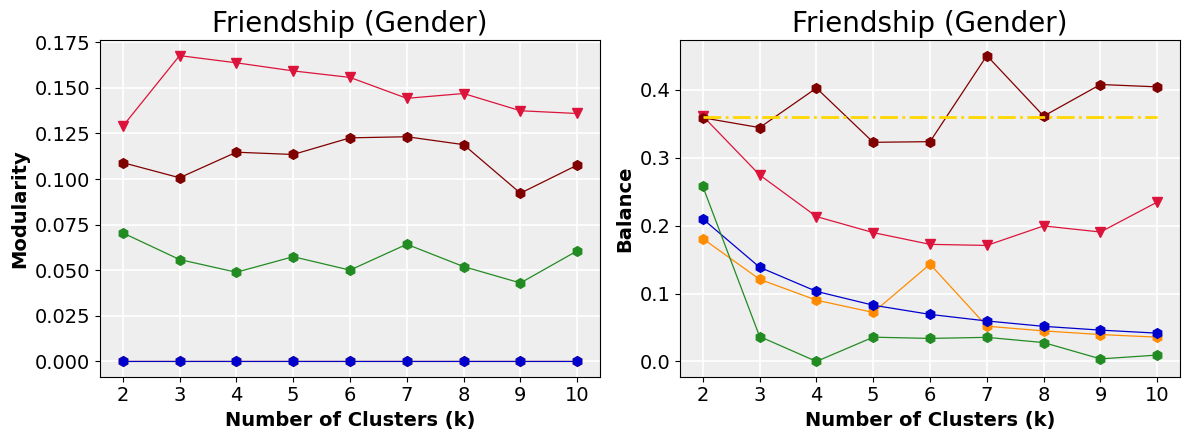

In [105]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#lmbd = [0.1, 4, 4, 3.5, 5, 2, 0.8, 1.4, 1.6]
lmbd = [0.005, 0.8, 0.2, 1.8, 1, 0.8, 1, 0.2, 0.6]

i_fnmtf_mod, i_fnmtf_bal = [],[]
for i,lam in enumerate(lmbd):
    cluster_rows = fair_nmf[fair_nmf['clusters (k)'] == i+2]
    i_fnmtf_mod.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["Q_FNMTF"].values )
    i_fnmtf_bal.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["B_FNMTF"].values )

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["B_FNMTF"].values
#df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
#i_fnmtf_mod = df["Q_FNMTF"].values
#i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k[0:9], g_sfsc_mod[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k[0:9], g_dmon_mod[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k[0:9], g_fsc_bal[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k[0:9], i_fnmtf_bal[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k[0:9], i_ifsc_bal[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k[0:9], g_sfsc_bal[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k[0:9], g_dmon_bal[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k[0:9], g_b[0:9], "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k[0:9])
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("Friendship (Gender)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=1, fontsize=14)

plt.savefig("Friendship_new_plots.svg", format='svg')
plt.show()

## 6.2. Parameter ($\lambda$) analysis


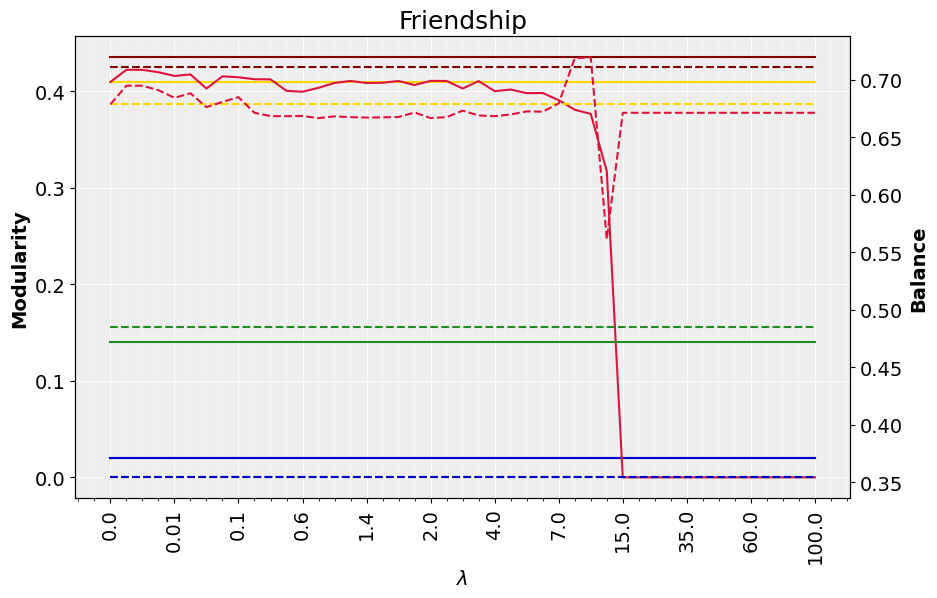

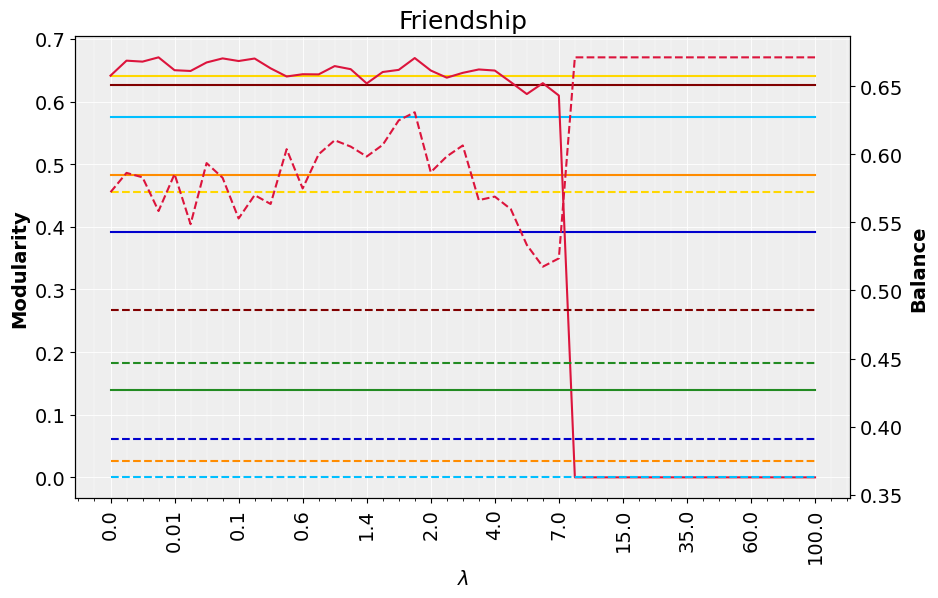

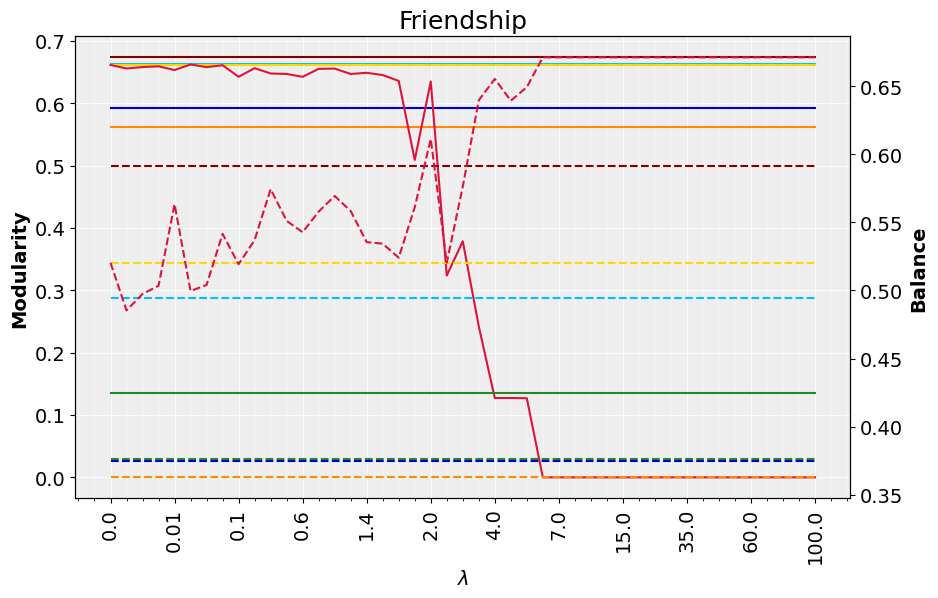

In [95]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6

    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"Friendship", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF modularity', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC modularity', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC modularity', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC modularity', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF modularity', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN modularity', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN balance', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=2, fontsize=10)
    plt.savefig("Friendship_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()
    

## 6.3. Pareto Analysis and IGDC calculations

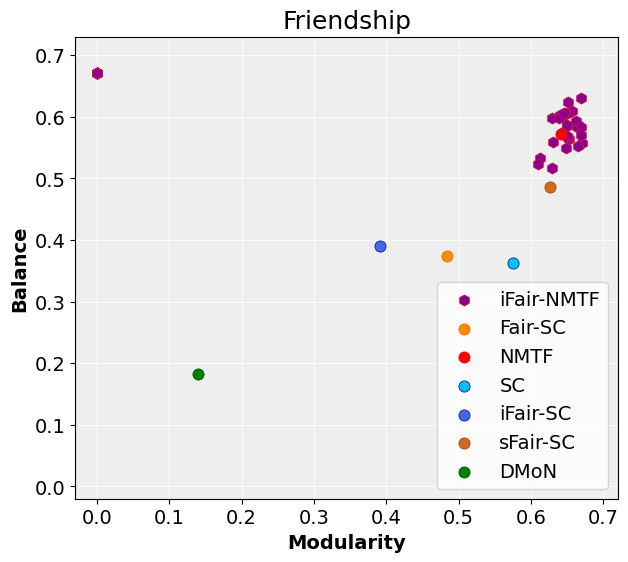

Average IGDC:
iFair_NMTF: 0.7275921007134496
sFair-SC: 0.6357978307633458
Fair_SC: 0.8112372049020182
iFair-SC: 0.8608821664530123
DMoN: 1.1864719640333277
Minimum IGDC:
iFair_NMTF: 0.4956055044239084
sFair-SC: 0.6357978307633458
Fair_SC: 0.8112372049020182 
iFair-SC: 0.8608821664530123
DMoN: 1.1864719640333277
      network    attr      method  clusters (k)  avg-IGDC  min-IGDC
0  Friendship  Gender  ifair_nmtf             5  0.727592  0.495606
1  Friendship  Gender    sfair_sc             5  0.635798  0.635798
2  Friendship  Gender     fair_sc             5  0.811237  0.811237
3  Friendship  Gender    ifair_sc             5  0.860882  0.860882
4  Friendship  Gender        dmon             5  1.186472  1.186472


network    attr      method  clusters (k)  avg-IGDC  min-IGDC
0  Friendship  Gender  ifair_nmtf             5  0.727592  0.495606
1  Friendship  Gender    sfair_sc             5  0.635798  0.635798
2  Friendship  Gender     fair_sc             5  0.811237  0.811237
3  Friendship  Gender    ifair_sc             5  0.860882  0.860882
4  Friendship  Gender        dmon             5  1.186472  1.186472

In [58]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1

figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"Friendship", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="darkmagenta", linewidths = 0.5, marker ="h", edgecolor ="crimson",s = 65, label='iFair-NMTF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="darkorange", linewidths = 0.5, marker ="o", edgecolor ="chocolate",s = 65, label='Fair-SC', zorder=2)
plt.scatter(i_nmtf_mod[ind], i_nmtf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="red",s = 65, label='NMTF', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="deepskyblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(i_ifsc_mod[ind], i_ifsc_bal[ind], c ="royalblue", linewidths = 0.5, marker ="o", edgecolor ="mediumblue",s = 65, label='iFair-SC', zorder=2)
plt.scatter(g_sfsc_mod[ind], g_sfsc_bal[ind], c ="chocolate", linewidths = 0.5, marker ="o", edgecolor ="saddlebrown",s = 65, label='sFair-SC', zorder=2)
plt.scatter(g_dmon_mod[ind], g_dmon_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='DMoN', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.03, 0.72)
plt.ylim(-0.02, 0.73)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_Friendship.svg", format='svg')
plt.show()

igdc_avg_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'avg')
igdc_avg_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\niFair_NMTF: {igdc_avg_ifnmtf}\nsFair-SC: {igdc_avg_sfsc}\nFair_SC: {igdc_avg_fsc}\niFair-SC: {igdc_avg_ifsc}\nDMoN: {igdc_avg_dmon}")

igdc_min_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'min')
igdc_min_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\niFair_NMTF: {igdc_min_ifnmtf}\nsFair-SC: {igdc_min_sfsc}\nFair_SC: {igdc_min_fsc} \niFair-SC: {igdc_min_ifsc}\nDMoN: {igdc_min_dmon}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["Friendship" for i in range(5)]
col2 = ["Gender" for i in range(5)]
col3 = ["ifair_nmtf", "sfair_sc", "fair_sc", "ifair_sc", "dmon"]
col4 = [num_c for i in range(5)]
col5 = [igdc_avg_ifnmtf, igdc_avg_sfsc, igdc_avg_fsc, igdc_avg_ifsc, igdc_avg_dmon]
col6 = [igdc_min_ifnmtf, igdc_min_sfsc, igdc_min_fsc, igdc_min_ifsc, igdc_min_dmon]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_Friendship_.csv', index=False)


# 7) NBA

In [96]:
path1 = "data/NBA/"
path2 = "Results/Final/combined results/"

A = (pd.read_csv(path1 + "NBAgraph.csv", header=None)).to_numpy()
F = (pd.read_csv(path1 + "NBAfeature.csv", header=None)).to_numpy()

all_in_one = np.ones(F.shape[0])
uniqe_vals, count = np.unique(F, return_counts=True)
NBA_balance = min(count)/max(count)

print(len(F), len(A))
print("Dataset balance = ", NBA_balance)

all_competitor = pd.read_csv(path2 + "NBA_all.csv")
fair_nmf = pd.read_csv(path2 + "NBA_k_lam_gridsearch_FNMTF.csv")

k = np.unique(fair_nmf["clusters (k)"].values)
g_b = [NBA_balance for i in range(len(k))]

400 400
Dataset balance =  0.36054421768707484


## 7.1. Comparisons on $Q ~~ \text{and} ~~Balance$

C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\300528537.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bh" (-> color='b'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\300528537.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mv" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
C:\Users\Siamak\AppData\Local\Temp\ipykernel_18908\300528537.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-mh" (-> color='m'). The keyword argument will take precedence.
  axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, l

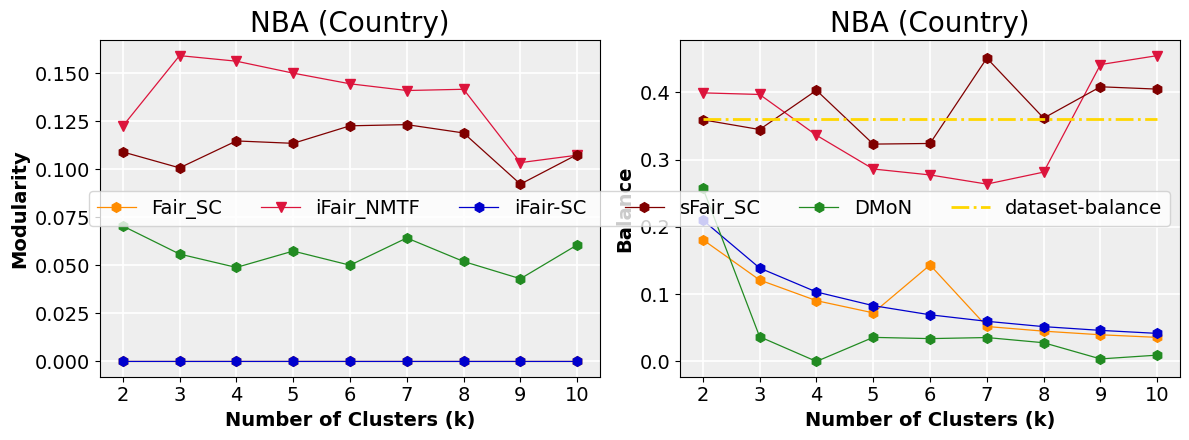

In [97]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5)) #(14,6) with legend. (12,4.5) no legend
styles = ["-bh", "-r^", "-bh", "-mv", "-mh", "-kh", "-gh"]  # ,["-b*","--c*",":k*"]

#lmbd = [0.0075, 4, 4, 9, 90, 100, 30, 10-15, 15-6]
#lmbd = [0.3, 5, 8, 30, 7, 8, 2.8, 50, 100]
lmbd = [0.3, 5, 8, 30, 7, 8, 2.8, 50, 6]
lmbd = [0.3, 5, 8, 9, 7, 8, 2.8, 50, 100]

i_fnmtf_mod, i_fnmtf_bal = [],[]
for i,lam in enumerate(lmbd):
    cluster_rows = fair_nmf[fair_nmf['clusters (k)'] == i+2]
    i_fnmtf_mod.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["Q_FNMTF"].values )
    i_fnmtf_bal.append( cluster_rows.loc[(cluster_rows['lam'] == lam)]["B_FNMTF"].values )

#i_fnmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["Q_FNMTF"].values
#i_fnmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 1.2)]["B_FNMTF"].values
#df = fair_nmf.loc[fair_nmf.groupby('clusters (k)')['B_FNMTF'].idxmax()]
#i_fnmtf_mod = df["Q_FNMTF"].values
#i_fnmtf_bal = df["B_FNMTF"].values

i_nmtf_mod = fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
i_nmtf_bal = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values

g_sfsc_mod = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["modularity"].values
i_ifsc_mod = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["modularity"].values
g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values
g_dmon_mod = all_competitor.loc[all_competitor['method'] == "DMoN"]["modularity"].values

g_sfsc_bal = all_competitor.loc[all_competitor['method'] == "sfair_sc"]["average balance"].values
i_ifsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_fsc_bal = all_competitor.loc[all_competitor['method'] == "ifair_sc"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values
g_dmon_bal = all_competitor.loc[all_competitor['method'] == "DMoN"]["average balance"].values

# plotting DrugNet-Gender graphs
#axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[0].plot(k, i_nmtf_mod, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[0].plot(k[0:9], g_fsc_mod[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[0].plot(k[0:9], i_fnmtf_mod[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[0].plot(k[0:9], i_ifsc_mod[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[0].plot(k[0:9], g_sfsc_mod[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[0].plot(k[0:9], g_dmon_mod[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

#axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9, color = "dodgerblue")
#axis[1].plot(k, i_nmtf_bal, styles[1], label='NMTF', markersize=7, linewidth=0.9)
axis[1].plot(k[0:9], g_fsc_bal[0:9], styles[2], label='Fair_SC', markersize=7, linewidth=0.9, color = "darkorange")
axis[1].plot(k[0:9], i_fnmtf_bal[0:9], styles[3], label='iFair_NMTF', markersize=7, linewidth=0.9, color = "crimson")
axis[1].plot(k[0:9], i_ifsc_bal[0:9], styles[4], label='iFair-SC', markersize=7, linewidth=0.9, color = "mediumblue")
axis[1].plot(k[0:9], g_sfsc_bal[0:9], styles[5], label='sFair_SC', markersize=7, linewidth=0.9, color = "maroon")
axis[1].plot(k[0:9], g_dmon_bal[0:9], styles[6], label='DMoN', markersize=7, linewidth=0.9, color = "forestgreen")

axis[1].plot(k[0:9], g_b[0:9], "-.", color="gold", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k[0:9])
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("NBA (Country)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
#plt.legend(loc="best", ncol=6, fontsize=14)

plt.savefig("NBA_new_plots.svg", format='svg')
plt.show()

## 7.2. Parameter ($\lambda$) analysis

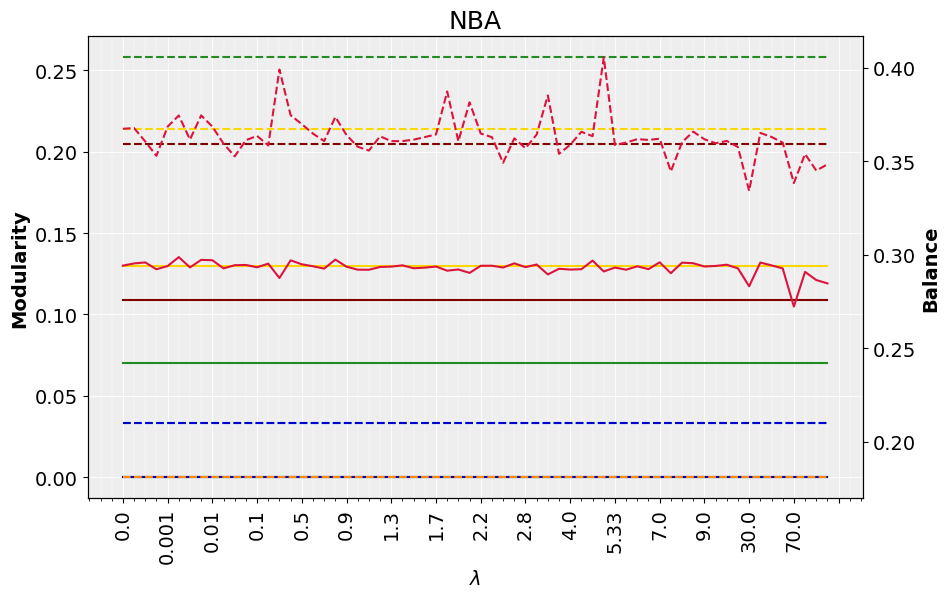

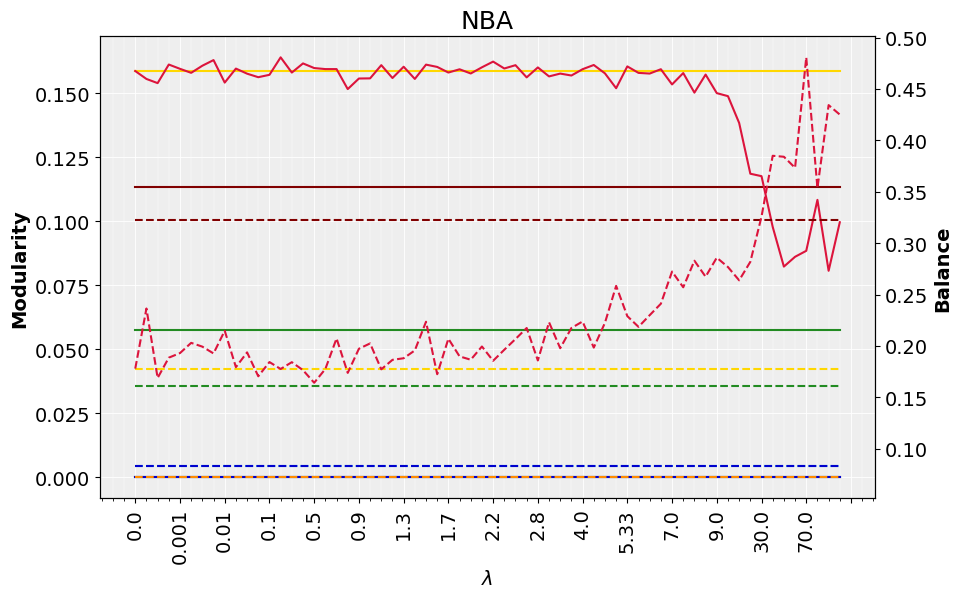

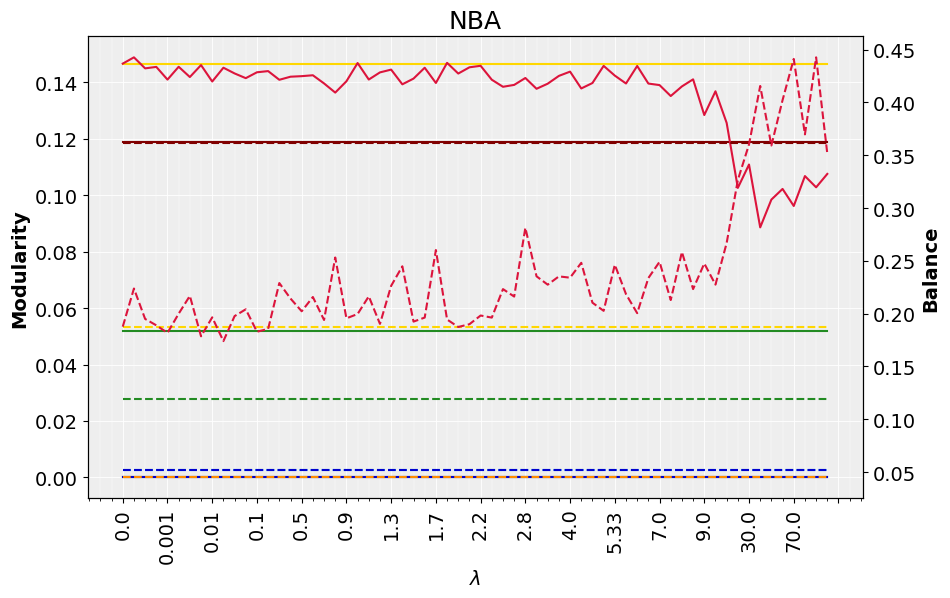

In [98]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6

    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(10, 6))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"NBA", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC modularity', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF modularity', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC modularity', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC modularity', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC modularity', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF modularity', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN modularity', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC balance', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF balance', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN balance', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    labels = [l.get_label() for l in plots]
    #axis.legend(plots, labels, loc="best", ncol=4, fontsize=14)
    plt.savefig("NBA_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()
    

## 7.3. Pareto Analysis and IGDC calculations

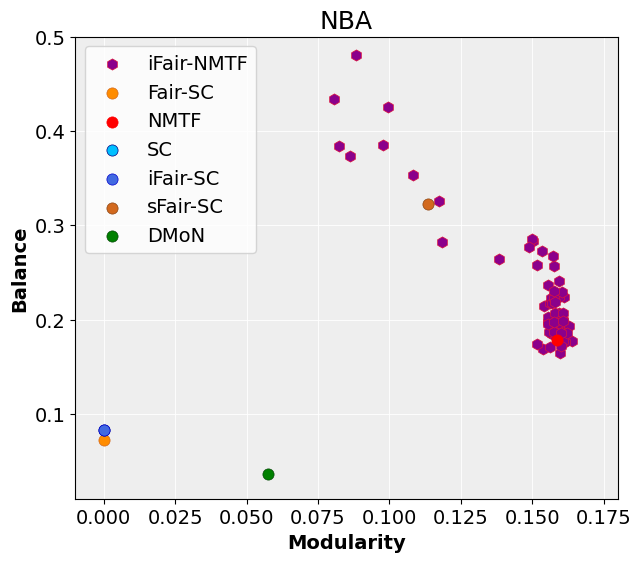

Average IGDC:
iFair_NMTF: 1.1478321330097032
sFair-SC: 1.1155538418392972
Fair_SC: 1.3641400836130662
iFair-SC: 1.3568903066004057
DMoN: 1.3484251544682402
Minimum IGDC:
iFair_NMTF: 1.049102180235457
sFair-SC: 1.1155538418392972
Fair_SC: 1.3641400836130662 
iFair-SC: 1.3568903066004057
DMoN: 1.3484251544682402
  network     attr      method  clusters (k)  avg-IGDC  min-IGDC
0     NBA  Country  ifair_nmtf             5  1.147832  1.049102
1     NBA  Country    sfair_sc             5  1.115554  1.115554
2     NBA  Country     fair_sc             5  1.364140  1.364140
3     NBA  Country    ifair_sc             5  1.356890  1.356890
4     NBA  Country        dmon             5  1.348425  1.348425


network     attr      method  clusters (k)  avg-IGDC  min-IGDC
0     NBA  Country  ifair_nmtf             5  1.147832  1.049102
1     NBA  Country    sfair_sc             5  1.115554  1.115554
2     NBA  Country     fair_sc             5  1.364140  1.364140
3     NBA  Country    ifair_sc             5  1.356890  1.356890
4     NBA  Country        dmon             5  1.348425  1.348425

In [71]:
ideal = np.asarray([1, 1])

num_c = 5
if (num_c==5):
    ind = 3
elif(num_c==3):
    ind = 1

figure, axis = plt.subplots(figsize=(7, 6))

scatter_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
scatter_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values

axis.set_facecolor('#EEEEEE') #EBEBEB
# Style the grid.
axis.grid(which='major', color='white', linewidth=0.6)
axis.grid(which='minor', color='white', linewidth=0.3)
#axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k=5$", fontsize=18)
axis.set_title(r"NBA", fontsize=18)
axis.tick_params(axis='both', labelsize=14)

plt.scatter(scatter_mod, scatter_bal, c ="darkmagenta", linewidths = 0.5, marker ="h", edgecolor ="crimson",s = 65, label='iFair-NMTF', zorder=2)
plt.scatter(g_fsc_mod[ind], g_fsc_bal[ind], c ="darkorange", linewidths = 0.5, marker ="o", edgecolor ="chocolate",s = 65, label='Fair-SC', zorder=2)
plt.scatter(i_nmtf_mod[ind], i_nmtf_bal[ind], c ="red", linewidths = 0.5, marker ="o", edgecolor ="red",s = 65, label='NMTF', zorder=2)
plt.scatter(g_sc_mod[ind], g_sc_bal[ind], c ="deepskyblue", linewidths = 0.5, marker ="o", edgecolor ="navy",s = 65, label='SC', zorder=2)
plt.scatter(i_ifsc_mod[ind], i_ifsc_bal[ind], c ="royalblue", linewidths = 0.5, marker ="o", edgecolor ="mediumblue",s = 65, label='iFair-SC', zorder=2)
plt.scatter(g_sfsc_mod[ind], g_sfsc_bal[ind], c ="chocolate", linewidths = 0.5, marker ="o", edgecolor ="saddlebrown",s = 65, label='sFair-SC', zorder=2)
plt.scatter(g_dmon_mod[ind], g_dmon_bal[ind], c ="green", linewidths = 0.5, marker ="o", edgecolor ="#054907",s = 65, label='DMoN', zorder=2)
#plt.scatter(ideal[0], ideal[1], c ="#3D1C02", linewidths = 0.5, marker ="D", edgecolor ="black",s = 65, label='Ideal Point', zorder=2)

#axis.plot(0, g_b[0], "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)
#plt.hlines(g_b[0], -0.03, 0.75, linestyle="dashed", color="darkorange", zorder=2, label='dataset-balance')

#plt.hlines(0.35, -0.03, 0.7 , linestyle="-.", color="#3D1C02", linewidths = 0.5)
#plt.vlines(0.70, -0.03, 0.35, linestyle="-.", color="#3D1C02", linewidths = 0.5)

plt.xlim(-0.01, 0.18)
plt.ylim(0.01, 0.5)

axis.set_xlabel("Modularity", fontsize=14, fontweight='bold')
axis.set_ylabel("Balance", fontsize=14, fontweight='bold')

plt.legend(loc="best", ncol=1, fontsize=14)
plt.savefig("pareto_NBA.svg", format='svg')
plt.show()

igdc_avg_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'avg')
igdc_avg_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'avg')
igdc_avg_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'avg')
igdc_avg_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'avg')
igdc_avg_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'avg')

print(f"Average IGDC:\niFair_NMTF: {igdc_avg_ifnmtf}\nsFair-SC: {igdc_avg_sfsc}\nFair_SC: {igdc_avg_fsc}\niFair-SC: {igdc_avg_ifsc}\nDMoN: {igdc_avg_dmon}")

igdc_min_ifnmtf = IGDC(np.vstack((scatter_mod, scatter_bal)),ideal, 'min')
igdc_min_sfsc  = IGDC(np.asarray([g_sfsc_mod[ind], g_sfsc_bal[ind]]),ideal, 'min')
igdc_min_fsc  = IGDC(np.asarray([g_fsc_mod[ind], g_fsc_bal[ind]]),ideal, 'min')
igdc_min_ifsc   = IGDC(np.asarray([i_ifsc_mod[ind], i_ifsc_bal[ind]]),ideal, 'min')
igdc_min_dmon   = IGDC(np.asarray([g_dmon_mod[ind], g_dmon_bal[ind]]),ideal, 'min')

print(f"Minimum IGDC:\niFair_NMTF: {igdc_min_ifnmtf}\nsFair-SC: {igdc_min_sfsc}\nFair_SC: {igdc_min_fsc} \niFair-SC: {igdc_min_ifsc}\nDMoN: {igdc_min_dmon}")

df1 = pd.DataFrame(columns=['network','attr','method', 'clusters (k)','min-IGDC','avg-IGDC'])

col1 = ["NBA" for i in range(5)]
col2 = ["Country" for i in range(5)]
col3 = ["ifair_nmtf", "sfair_sc", "fair_sc", "ifair_sc", "dmon"]
col4 = [num_c for i in range(5)]
col5 = [igdc_avg_ifnmtf, igdc_avg_sfsc, igdc_avg_fsc, igdc_avg_ifsc, igdc_avg_dmon]
col6 = [igdc_min_ifnmtf, igdc_min_sfsc, igdc_min_fsc, igdc_min_ifsc, igdc_min_dmon]

results = dict()
results = {'network': col1, 'attr': col2, 'method': col3,
           'clusters (k)': col4, 'avg-IGDC': col5, 'min-IGDC': col6}
df = pd.DataFrame((results))
print(df)
display(df)
df.to_csv('IGDC_k_'+str(num_c)+'_NBA_.csv', index=False)


# 8) Table

### Modularity ($\textbf{Q}$) table 

In [106]:
path2 = "Results/Final/combined results/"
comp_nba = pd.read_csv(path2 + "NBA_all.csv")
fnmf_nba = pd.read_csv(path2 + "NBA_k_lam_gridsearch_FNMTF.csv")

#path2 = "results/New/School/"
comp_friendship = pd.read_csv(path2 + "Friendship_all.csv")
fnmf_friendship = pd.read_csv(path2 + "Friendship_k_lam_gridsearch_FNMTF.csv")

#path2 = "results/New/School/"
comp_fb = pd.read_csv(path2 + "Facebook_all.csv")
fnmf_fb = pd.read_csv(path2 + "Facebook_k_lam_gridsearch_FNMTF.csv")

#path2 = "results/New/School/"
comp_diaries = pd.read_csv(path2 + "Diaries_all.csv")
fnmf_diaries = pd.read_csv(path2 + "Diaries_k_lam_gridsearch_FNMTF.csv")

#path2 = "results/New/DrugNet/"
comp_drugnet = pd.read_csv(path2 + "DrugNET_ethnicity_all.csv")
fnmf_drugnet = pd.read_csv(path2 + "DrugNET_ethnicity_k_lam_gridsearch_FNMTF.csv")

#path2 = "results/New/LastFM/"
comp_lastfm = pd.read_csv(path2 + "LastFM_all.csv")
fnmf_lastfm = pd.read_csv(path2 + "LastFM_k_lam_gridsearch_FNMTF.csv")

In [112]:
# NBA
#fnmf_mod_nba_1 = fnmf_nba.loc[(fnmf_nba['lam'] == 1) &  (fnmf_nba['clusters (k)'] == 5)]["Q_FNMTF"].values[0]
fnmf_mod_nba = fnmf_nba.loc[(fnmf_nba['lam'] == 9) & (fnmf_nba['clusters (k)'] == 5)]["Q_FNMTF"].values[0]
#fnmf_bal_nba_1 = fnmf_nba.loc[(fnmf_nba['lam'] == 1) & (fnmf_nba['clusters (k)'] == 5)]["B_FNMTF"].values[0]
fnmf_bal_nba = fnmf_nba.loc[(fnmf_nba['lam'] == 9) & (fnmf_nba['clusters (k)'] == 5)]["B_FNMTF"].values[0]

fsc_mod_nba = (comp_nba.loc[comp_nba['method'] == "fair_sc"]["modularity"].values)[3]
sfsc_mod_nba = (comp_nba.loc[comp_nba['method'] == "sfair_sc"]["modularity"].values)[3]
ifsc_mod_nba = (comp_nba.loc[comp_nba['method'] == "ifair_sc"]["modularity"].values)[3]
dmon_mod_nba = (comp_nba.loc[comp_nba['method'] == "DMoN"]["modularity"].values)[3]

fsc_bal_nba = (comp_nba.loc[comp_nba['method'] == "fair_sc"]["average balance"].values)[3]
sfsc_bal_nba = (comp_nba.loc[comp_nba['method'] == "sfair_sc"]["average balance"].values)[3]
ifsc_bal_nba = (comp_nba.loc[comp_nba['method'] == "ifair_sc"]["average balance"].values)[3]
dmon_bal_nba = (comp_nba.loc[comp_nba['method'] == "DMoN"]["average balance"].values)[3]

# Friendship
#fnmf_mod_friendship_1 = fnmf_friendship.loc[(fnmf_friendship['lam'] == 1) &  (fnmf_friendship['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_mod_friendship = fnmf_friendship.loc[(fnmf_friendship['lam'] == 1.8) & (fnmf_friendship['clusters (k)'] == 5)]["Q_FNMTF"].values[0]
#fnmf_bal_friendship _1 = fnmf_friendship.loc[(fnmf_friendship['lam'] == 1) & (fnmf_friendship['clusters (k)'] == 5)]["average balance"].values[0]
fnmf_bal_friendship = fnmf_friendship.loc[(fnmf_friendship['lam'] == 1.8) & (fnmf_friendship['clusters (k)'] == 5)]["B_FNMTF"].values[0]

fsc_mod_friendship = (comp_friendship.loc[comp_friendship['method'] == "fair_sc"]["modularity"].values)[3]
sfsc_mod_friendship = (comp_friendship.loc[comp_friendship['method'] == "sfair_sc"]["modularity"].values)[3]
ifsc_mod_friendship = (comp_friendship.loc[comp_friendship['method'] == "ifair_sc"]["modularity"].values)[3]
dmon_mod_friendship = (comp_friendship.loc[comp_friendship['method'] == "DMoN"]["modularity"].values)[3]

fsc_bal_friendship = (comp_friendship.loc[comp_friendship['method'] == "fair_sc"]["average balance"].values)[3]
sfsc_bal_friendship = (comp_friendship.loc[comp_friendship['method'] == "sfair_sc"]["average balance"].values)[3]
ifsc_bal_friendship = (comp_friendship.loc[comp_friendship['method'] == "ifair_sc"]["average balance"].values)[3]
dmon_bal_friendship = (comp_friendship.loc[comp_friendship['method'] == "DMoN"]["average balance"].values)[3]


# Facebook
#fnmf_mod_fb_1 = fnmf_fb.loc[(fnmf_fb['lam'] == 1) &  (fnmf_fb['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_mod_fb = fnmf_fb.loc[(fnmf_fb['lam'] == 40) & (fnmf_fb['clusters (k)'] == 5)]["Q_FNMTF"].values[0]
#fnmf_bal_fb _1 = fnmf_fb.loc[(fnmf_fb['lam'] == 1) & (fnmf_fb['clusters (k)'] == 5)]["average balance"].values[0]
fnmf_bal_fb = fnmf_fb.loc[(fnmf_fb['lam'] == 40) & (fnmf_fb['clusters (k)'] == 5)]["B_FNMTF"].values[0]

fsc_mod_fb = (comp_fb.loc[comp_fb['method'] == "fair_sc"]["modularity"].values)[3]
sfsc_mod_fb = (comp_fb.loc[comp_fb['method'] == "sfair_sc"]["modularity"].values)[3]
ifsc_mod_fb = (comp_fb.loc[comp_fb['method'] == "ifair_sc"]["modularity"].values)[3]
dmon_mod_fb = (comp_fb.loc[comp_fb['method'] == "DMoN"]["modularity"].values)[3]

fsc_bal_fb = (comp_fb.loc[comp_fb['method'] == "fair_sc"]["average balance"].values)[3]
sfsc_bal_fb = (comp_fb.loc[comp_fb['method'] == "sfair_sc"]["average balance"].values)[3]
ifsc_bal_fb = (comp_fb.loc[comp_fb['method'] == "ifair_sc"]["average balance"].values)[3]
dmon_bal_fb = (comp_fb.loc[comp_fb['method'] == "DMoN"]["average balance"].values)[3]


# DrugNet
#fnmf_mod_drugnet_1 = fnmf_drugnet.loc[(fnmf_drugnet['lam'] == 1) &  (fnmf_drugnet['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_mod_drugnet = fnmf_drugnet.loc[(fnmf_drugnet['lam'] == 1.2) & (fnmf_drugnet['clusters (k)'] == 5)]["Q_FNMTF"].values[0]
#fnmf_bal_drugnet _1 = fnmf_drugnet.loc[(fnmf_drugnet['lam'] == 1) & (fnmf_drugnet['clusters (k)'] == 5)]["average balance"].values[0]
fnmf_bal_drugnet = fnmf_drugnet.loc[(fnmf_drugnet['lam'] == 1.2) & (fnmf_drugnet['clusters (k)'] == 5)]["B_FNMTF"].values[0]

fsc_mod_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "fair_sc"]["modularity"].values)[3]
sfsc_mod_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "sfair_sc"]["modularity"].values)[3]
ifsc_mod_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "ifair_sc"]["modularity"].values)[3]
dmon_mod_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "DMoN"]["modularity"].values)[3]

fsc_bal_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "fair_sc"]["average balance"].values)[3]
sfsc_bal_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "sfair_sc"]["average balance"].values)[3]
ifsc_bal_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "ifair_sc"]["average balance"].values)[3]
dmon_bal_drugnet = (comp_drugnet.loc[comp_drugnet['method'] == "DMoN"]["average balance"].values)[3]


# Contact Diaries
#fnmf_mod_diaries_1 = fnmf_diaries.loc[(fnmf_diaries['lam'] == 1) &(fnmf_diaries['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_mod_diaries = fnmf_diaries.loc[(fnmf_diaries['lam'] == 3.5) & (fnmf_diaries['clusters (k)'] == 5)]["Q_FNMTF"].values[0]
#fnmf_bal_diaries_1 = fnmf_diaries.loc[(fnmf_diaries['lam'] == 1) & (fnmf_diaries['clusters (k)'] == 5)]["average balance"].values[0]
fnmf_bal_diaries = fnmf_diaries.loc[(fnmf_diaries['lam'] == 3.5) & (fnmf_diaries['clusters (k)'] == 5)]["B_FNMTF"].values[0]

fsc_mod_diaries = (comp_diaries.loc[comp_diaries['method'] == "fair_sc"]["modularity"].values)[3]
sfsc_mod_diaries = (comp_diaries.loc[comp_diaries['method'] == "sfair_sc"]["modularity"].values)[3]
ifsc_mod_diaries = (comp_diaries.loc[comp_diaries['method'] == "ifair_sc"]["modularity"].values)[3]
dmon_mod_diaries = (comp_diaries.loc[comp_diaries['method'] == "DMoN"]["modularity"].values)[3]

fsc_bal_diaries = (comp_diaries.loc[comp_diaries['method'] == "fair_sc"]["average balance"].values)[3]
sfsc_bal_diaries = (comp_diaries.loc[comp_diaries['method'] == "sfair_sc"]["average balance"].values)[3]
ifsc_bal_diaries = (comp_diaries.loc[comp_diaries['method'] == "ifair_sc"]["average balance"].values)[3]
dmon_bal_diaries = (comp_diaries.loc[comp_diaries['method'] == "DMoN"]["average balance"].values)[3]


# LastFM
#fnmf_mod_lastfm_1 = fnmf_lastfm.loc[(fnmf_lastfm['lam'] == 1) & (fnmf_lastfm['clusters (k)'] == 5)]["modularity"].values[0]
fnmf_mod_lastfm = fnmf_lastfm.loc[(fnmf_lastfm['lam'] == 10) & (fnmf_lastfm['clusters (k)'] == 5)]["Q_FNMTF"].values[0]
#fnmf_bal_lastfm_1 = fnmf_lastfm.loc[(fnmf_lastfm['lam'] == 1) & (fnmf_lastfm['clusters (k)'] == 5)]["average balance"].values[0]
fnmf_bal_lastfm = fnmf_lastfm.loc[(fnmf_lastfm['lam'] == 10) & (fnmf_lastfm['clusters (k)'] == 5)]["B_FNMTF"].values[0]

fsc_mod_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "fair_sc"]["modularity"].values)[3]
sfsc_mod_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "sfair_sc"]["modularity"].values)[3]
ifsc_mod_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "ifair_sc"]["modularity"].values)[3]
dmon_mod_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "DMoN"]["modularity"].values)[3]

fsc_bal_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "fair_sc"]["average balance"].values)[3]
sfsc_bal_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "sfair_sc"]["average balance"].values)[3]
ifsc_bal_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "ifair_sc"]["average balance"].values)[3]
dmon_bal_lastfm = (comp_lastfm.loc[comp_lastfm['method'] == "DMoN"]["average balance"].values)[3]


## Modularity

In [113]:
col1 = ["Contact Diaries","Facebook","Friendship","DrugNet","NBA","LastFM"]
col2 = [fsc_mod_diaries, fsc_mod_fb, fsc_mod_friendship, fsc_mod_drugnet, fsc_mod_nba, fsc_mod_lastfm]
col3 = [sfsc_mod_diaries,sfsc_mod_fb,sfsc_mod_friendship,sfsc_mod_drugnet,sfsc_mod_nba,sfsc_mod_lastfm]
col4 = [ifsc_mod_diaries,ifsc_mod_fb,ifsc_mod_friendship,ifsc_mod_drugnet,ifsc_mod_nba,ifsc_mod_lastfm]
col5 = [dmon_mod_diaries, dmon_mod_fb, dmon_mod_friendship, dmon_mod_drugnet, dmon_mod_nba, dmon_mod_lastfm]
col6 = [fnmf_mod_diaries, fnmf_mod_fb, fnmf_mod_friendship, fnmf_mod_drugnet, fnmf_mod_nba, fnmf_mod_lastfm]

col_2 = [ '%.3f' % elem for elem in col2 ]
col_3 = [ '%.3f' % elem for elem in col3 ]
col_4 = [ '%.3f' % elem for elem in col4 ]
col_5 = [ '%.3f' % elem for elem in col5 ]
col_6 = [ '%.3f' % elem for elem in col6 ]

#col_2[4], col_3[4] = '%.1e' %sc_mod_nba , '%.1e' %fsc_mod_nba

results = dict()
results = {'Network':col1, 'FairSC':col_2, 'sFairSC':col_3, 'iFairSC':col_4, 'DMoN':col_5,
           r'iFairNMTF':col_6}
modularity = pd.DataFrame((results))
display(modularity)

Network  FairSC sFairSC iFairSC   DMoN iFairNMTF
0  Contact Diaries   0.612   0.684   0.647  0.145     0.640
1         Facebook   0.449   0.500   0.448  0.048     0.509
2       Friendship   0.483   0.627   0.392  0.140     0.669
3          DrugNet   0.263   0.270   0.263  0.326     0.588
4              NBA  -0.000   0.113  -0.000  0.057     0.150
5           LastFM   0.003   0.035   0.002  0.526       nan

## Balance

In [114]:
col1 = ["Contact Diaries","Facebook","Friendship","DrugNet","NBA","LastFM"]
col2 = [fsc_bal_diaries, fsc_bal_fb, fsc_bal_friendship, fsc_bal_drugnet, fsc_bal_nba, fsc_bal_lastfm]
col3 = [sfsc_bal_diaries,sfsc_bal_fb,sfsc_bal_friendship,sfsc_bal_drugnet,sfsc_bal_nba,sfsc_bal_lastfm]
col4 = [ifsc_bal_diaries,ifsc_bal_fb,ifsc_bal_friendship,ifsc_bal_drugnet,ifsc_bal_nba,ifsc_bal_lastfm]
col5 = [dmon_bal_diaries, dmon_bal_fb, dmon_bal_friendship, dmon_bal_drugnet, dmon_bal_nba, dmon_bal_lastfm]
col6 = [fnmf_bal_diaries, fnmf_bal_fb, fnmf_bal_friendship, fnmf_bal_drugnet, fnmf_bal_nba, fnmf_bal_lastfm]

col_2 = [ '%.3f' % elem for elem in col2 ]
col_3 = [ '%.3f' % elem for elem in col3 ]
col_4 = [ '%.3f' % elem for elem in col4 ]
col_5 = [ '%.3f' % elem for elem in col5 ]
col_6 = [ '%.3f' % elem for elem in col6 ]

#col_2[4], col_3[4] = '%.1e' %sc_bal_nba , '%.1e' %fsc_bal_nba

results = dict()
results = {'Network':col1, 'FairSC':col_2, 'sFairSC':col_3, 'iFairSC':col_4, 'DMoN':col_5,
           r'iFairNMTF':col_6}
balance = pd.DataFrame((results))
display(balance)

Network FairSC sFairSC iFairSC   DMoN iFairNMTF
0  Contact Diaries  0.708   0.809   0.699  0.263     0.648
1         Facebook  0.327   0.602   0.330  0.268     0.514
2       Friendship  0.391   0.485   0.374  0.183     0.631
3          DrugNet  0.052   0.052   0.061  0.000     0.124
4              NBA  0.083   0.323   0.072  0.036     0.286
5           LastFM  0.065   0.056   0.066  0.000       nan

In [115]:
col1 = ["Contact Diaries","Facebook","Friendship","DrugNet","NBA","LastFM"]
col2 = [fsc_bal_diaries, fsc_bal_fb, fsc_bal_friendship, fsc_bal_drugnet, fsc_bal_nba, fsc_bal_lastfm]
col4 = [sfsc_bal_diaries,sfsc_bal_fb,sfsc_bal_friendship,sfsc_bal_drugnet,sfsc_bal_nba,sfsc_bal_lastfm]
col6 = [ifsc_bal_diaries,ifsc_bal_fb,ifsc_bal_friendship,ifsc_bal_drugnet,ifsc_bal_nba,ifsc_bal_lastfm]
col8 = [dmon_bal_diaries, dmon_bal_fb, dmon_bal_friendship, dmon_bal_drugnet, dmon_bal_nba, dmon_bal_lastfm]
col10 = [fnmf_bal_diaries, fnmf_bal_fb, fnmf_bal_friendship, fnmf_bal_drugnet, fnmf_bal_nba, fnmf_bal_lastfm]

col3 = [fsc_mod_diaries, fsc_mod_fb, fsc_mod_friendship, fsc_mod_drugnet, fsc_mod_nba, fsc_mod_lastfm]
col5 = [sfsc_mod_diaries,sfsc_mod_fb,sfsc_mod_friendship,sfsc_mod_drugnet,sfsc_mod_nba,sfsc_mod_lastfm]
col7 = [ifsc_mod_diaries,ifsc_mod_fb,ifsc_mod_friendship,ifsc_mod_drugnet,ifsc_mod_nba,ifsc_mod_lastfm]
col9 = [dmon_mod_diaries, dmon_mod_fb, dmon_mod_friendship, dmon_mod_drugnet, dmon_mod_nba, dmon_mod_lastfm]
col11 = [fnmf_mod_diaries, fnmf_mod_fb, fnmf_mod_friendship, fnmf_mod_drugnet, fnmf_mod_nba, fnmf_mod_lastfm]

col_2 = [ '%.3f' % elem for elem in col2 ]; col_3 = [ '%.3f' % elem for elem in col3 ]
col_4 = [ '%.3f' % elem for elem in col4 ]; col_5 = [ '%.3f' % elem for elem in col5 ]
col_6 = [ '%.3f' % elem for elem in col6 ]; col_7 = [ '%.3f' % elem for elem in col7 ];
col_8 = [ '%.3f' % elem for elem in col8 ]; col_9 = [ '%.3f' % elem for elem in col9 ]
col_10 = [ '%.3f' % elem for elem in col10 ]; col_11 = [ '%.3f' % elem for elem in col11 ]

#col_3[4], col_5[4] = '%.1e' %sc_mod_nba, '%.1e' %fsc_mod_nba

results = dict()
results = {'Network':col1, r'$B$-FairSC':col_2, r'$Q$-FairSC':col_3, r'$B$-sFairSC':col_4,
           r'$Q$-sFairSC':col_5, r'$B$-iFairSC':col_6, r'$Q$-iFairSC':col_7, r'$B$-DMoN':col_8,
           r'$Q$-DMoN':col_9, r'$B$-iFairNMTF':col_10, r'$Q$-iFairNMTF':col_11}

df = pd.DataFrame((results))
display(df)

Network $B$-FairSC $Q$-FairSC $B$-sFairSC $Q$-sFairSC $B$-iFairSC  \
0  Contact Diaries      0.708      0.612       0.809       0.684       0.699   
1         Facebook      0.327      0.449       0.602       0.500       0.330   
2       Friendship      0.391      0.483       0.485       0.627       0.374   
3          DrugNet      0.052      0.263       0.052       0.270       0.061   
4              NBA      0.083     -0.000       0.323       0.113       0.072   
5           LastFM      0.065      0.003       0.056       0.035       0.066   

  $Q$-iFairSC $B$-DMoN $Q$-DMoN $B$-iFairNMTF $Q$-iFairNMTF  
0       0.647    0.263    0.145         0.648         0.640  
1       0.448    0.268    0.048         0.514         0.509  
2       0.392    0.183    0.140         0.631         0.669  
3       0.263    0.000    0.326         0.124         0.588  
4      -0.000    0.036    0.057         0.286         0.150  
5       0.002    0.000    0.526           nan           nan

## Produce long Legend

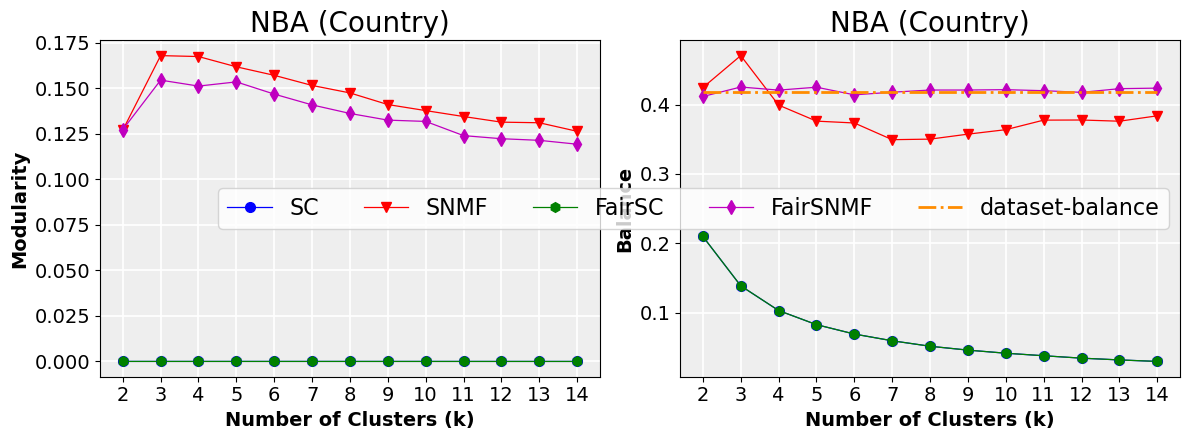

In [248]:
figure, axis = plt.subplots(1, 2, figsize=(12, 4.5))
styles = ["-bo", "-rv", "-gh", "-md", ":m"]  # ,["-b*","--c*",":k*"]

g_fnmf_mod = fair_nmf.loc[(fair_nmf['lam'] == 4)]["modularity"].values

g_fnmf_bal = fair_nmf.loc[(fair_nmf['lam'] == 4)]["average balance"].values

g_fsc_mod = all_competitor.loc[all_competitor['method'] == "fair_sc"]["modularity"].values
g_nmf_mod = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["modularity"].values
g_sc_mod = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["modularity"].values

g_fsc_bal = all_competitor.loc[all_competitor['method'] == "fair_sc"]["average balance"].values
g_nmf_bal = all_competitor.loc[all_competitor['method'] == "vanilla_nmf"]["average balance"].values
g_sc_bal = all_competitor.loc[all_competitor['method'] == "vanilla_sc"]["average balance"].values

# plotting DrugNet-Gender graphs
axis[0].plot(k, g_sc_mod, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_nmf_mod, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fsc_mod, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[0].plot(k, g_fnmf_mod, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_sc_bal, styles[0], label='SC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_nmf_bal, styles[1], label='SNMF', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fsc_bal, styles[2], label='FairSC', markersize=7, linewidth=0.9)
axis[1].plot(k, g_fnmf_bal, styles[3], label='FairSNMF', markersize=7, linewidth=0.9)

axis[1].plot(k, g_b, "-.", color="darkorange", label='dataset-balance', markersize=8, linewidth=2.0)

# Give plot a gray background like ggplot.
for i in range(2):
    axis[i].set_xticks(k)
    axis[i].set_xlabel("Number of Clusters (k)", fontsize=14, fontweight='bold')
    axis[i].set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid.
    axis[i].grid(which='major', color='white', linewidth=1.2)
    axis[i].grid(which='minor', color='white', linewidth=0.6)

    axis[i].set_title("NBA (Country)", fontsize=20)
    axis[i].tick_params(axis='both', labelsize=14)

axis[0].set_ylabel("Modularity", fontsize=14, fontweight='bold')
axis[1].set_ylabel("Balance", fontsize=14, fontweight='bold')

figure.tight_layout()
plt.legend(loc="best", ncol=5, fontsize=16)

plt.savefig("4_legend.svg", format='svg')
plt.show()

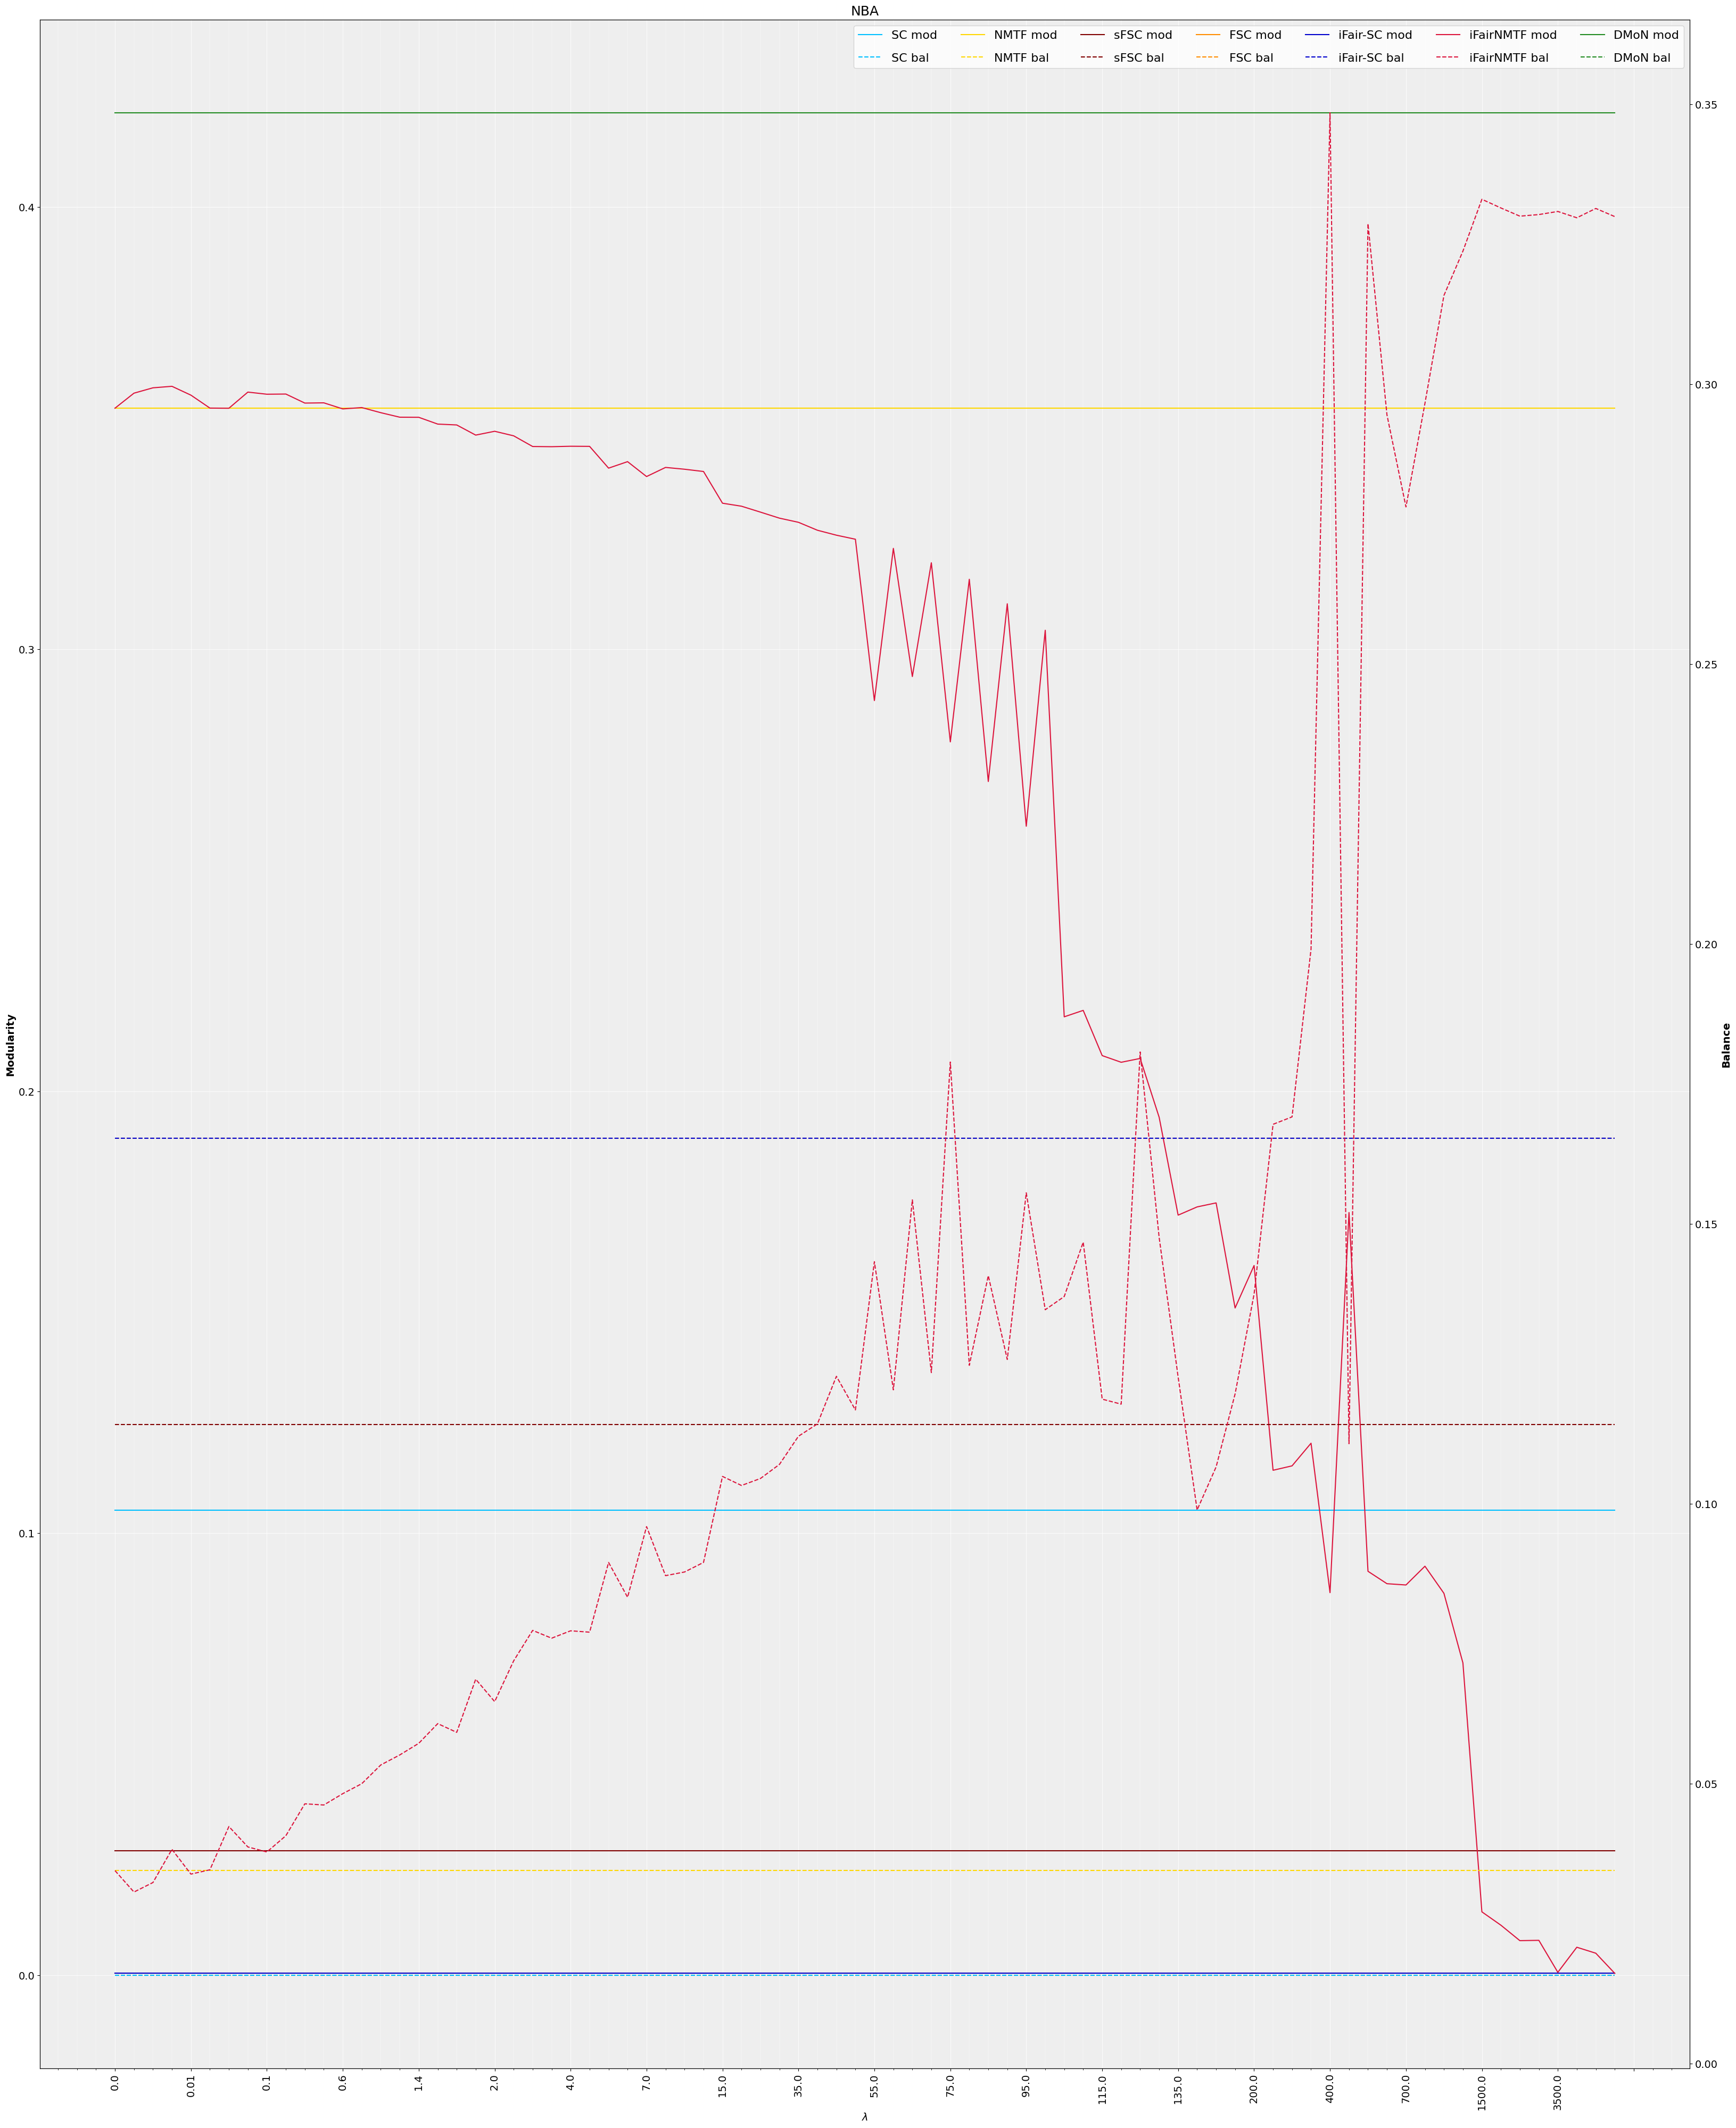

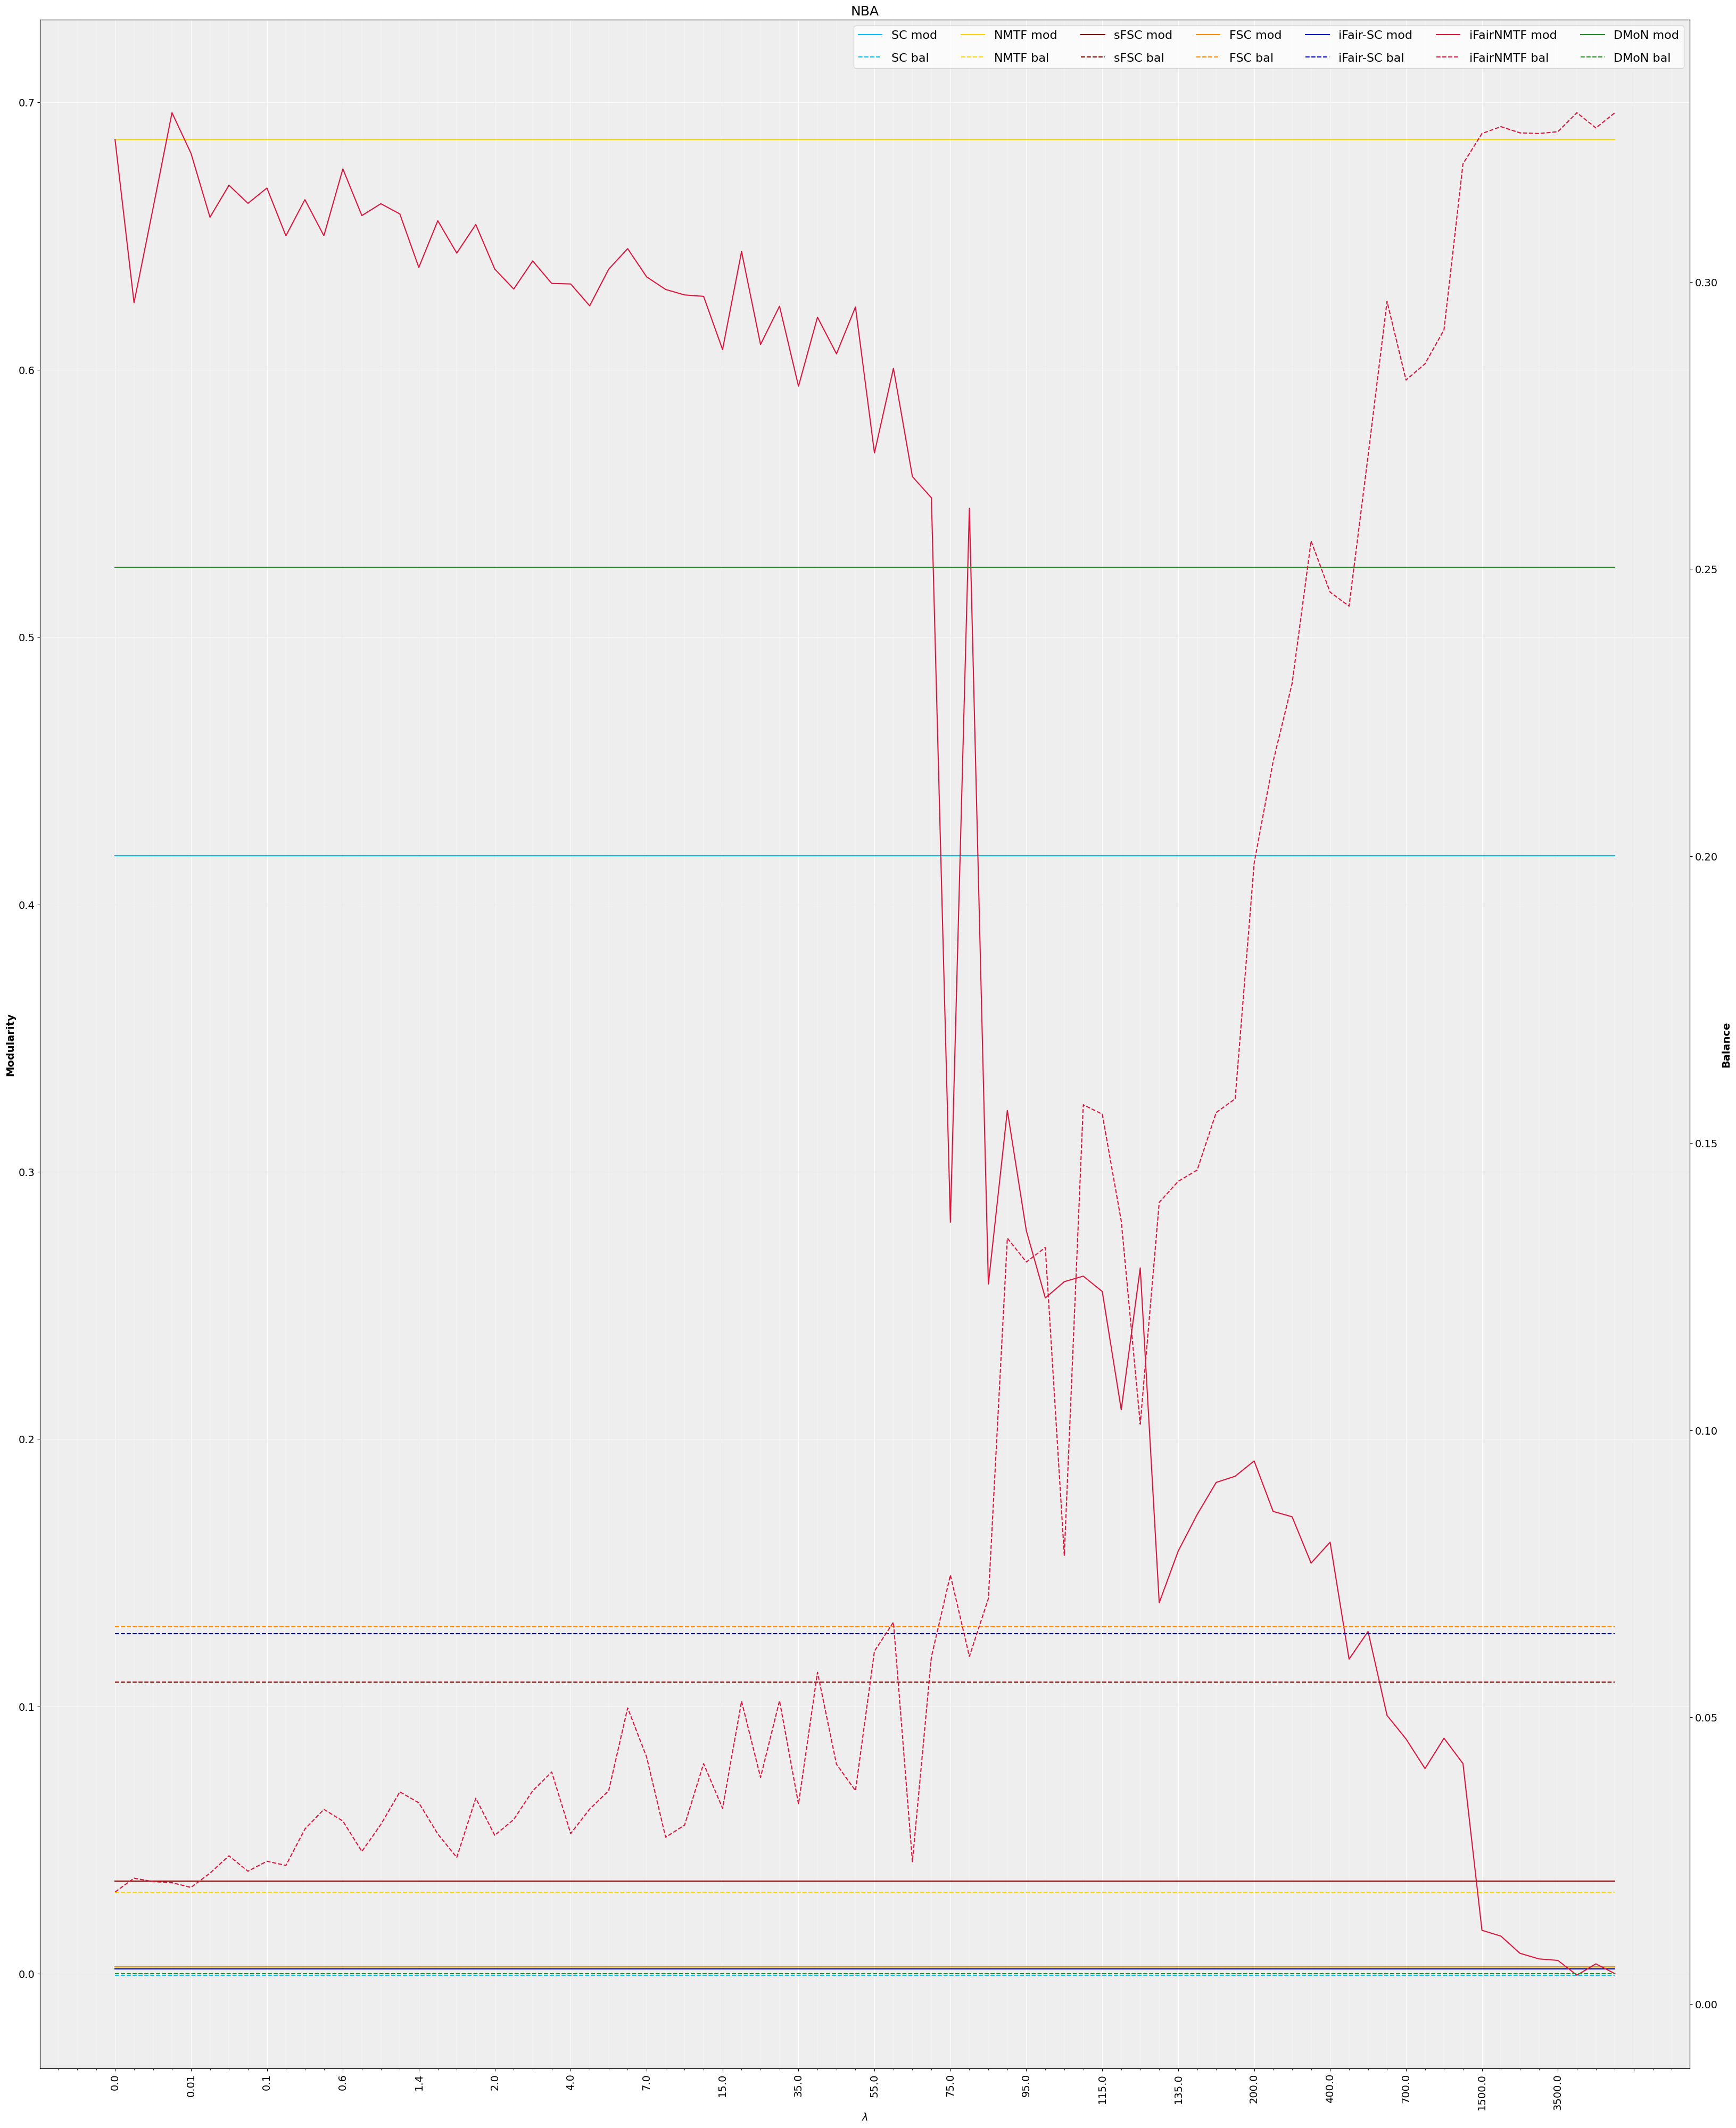

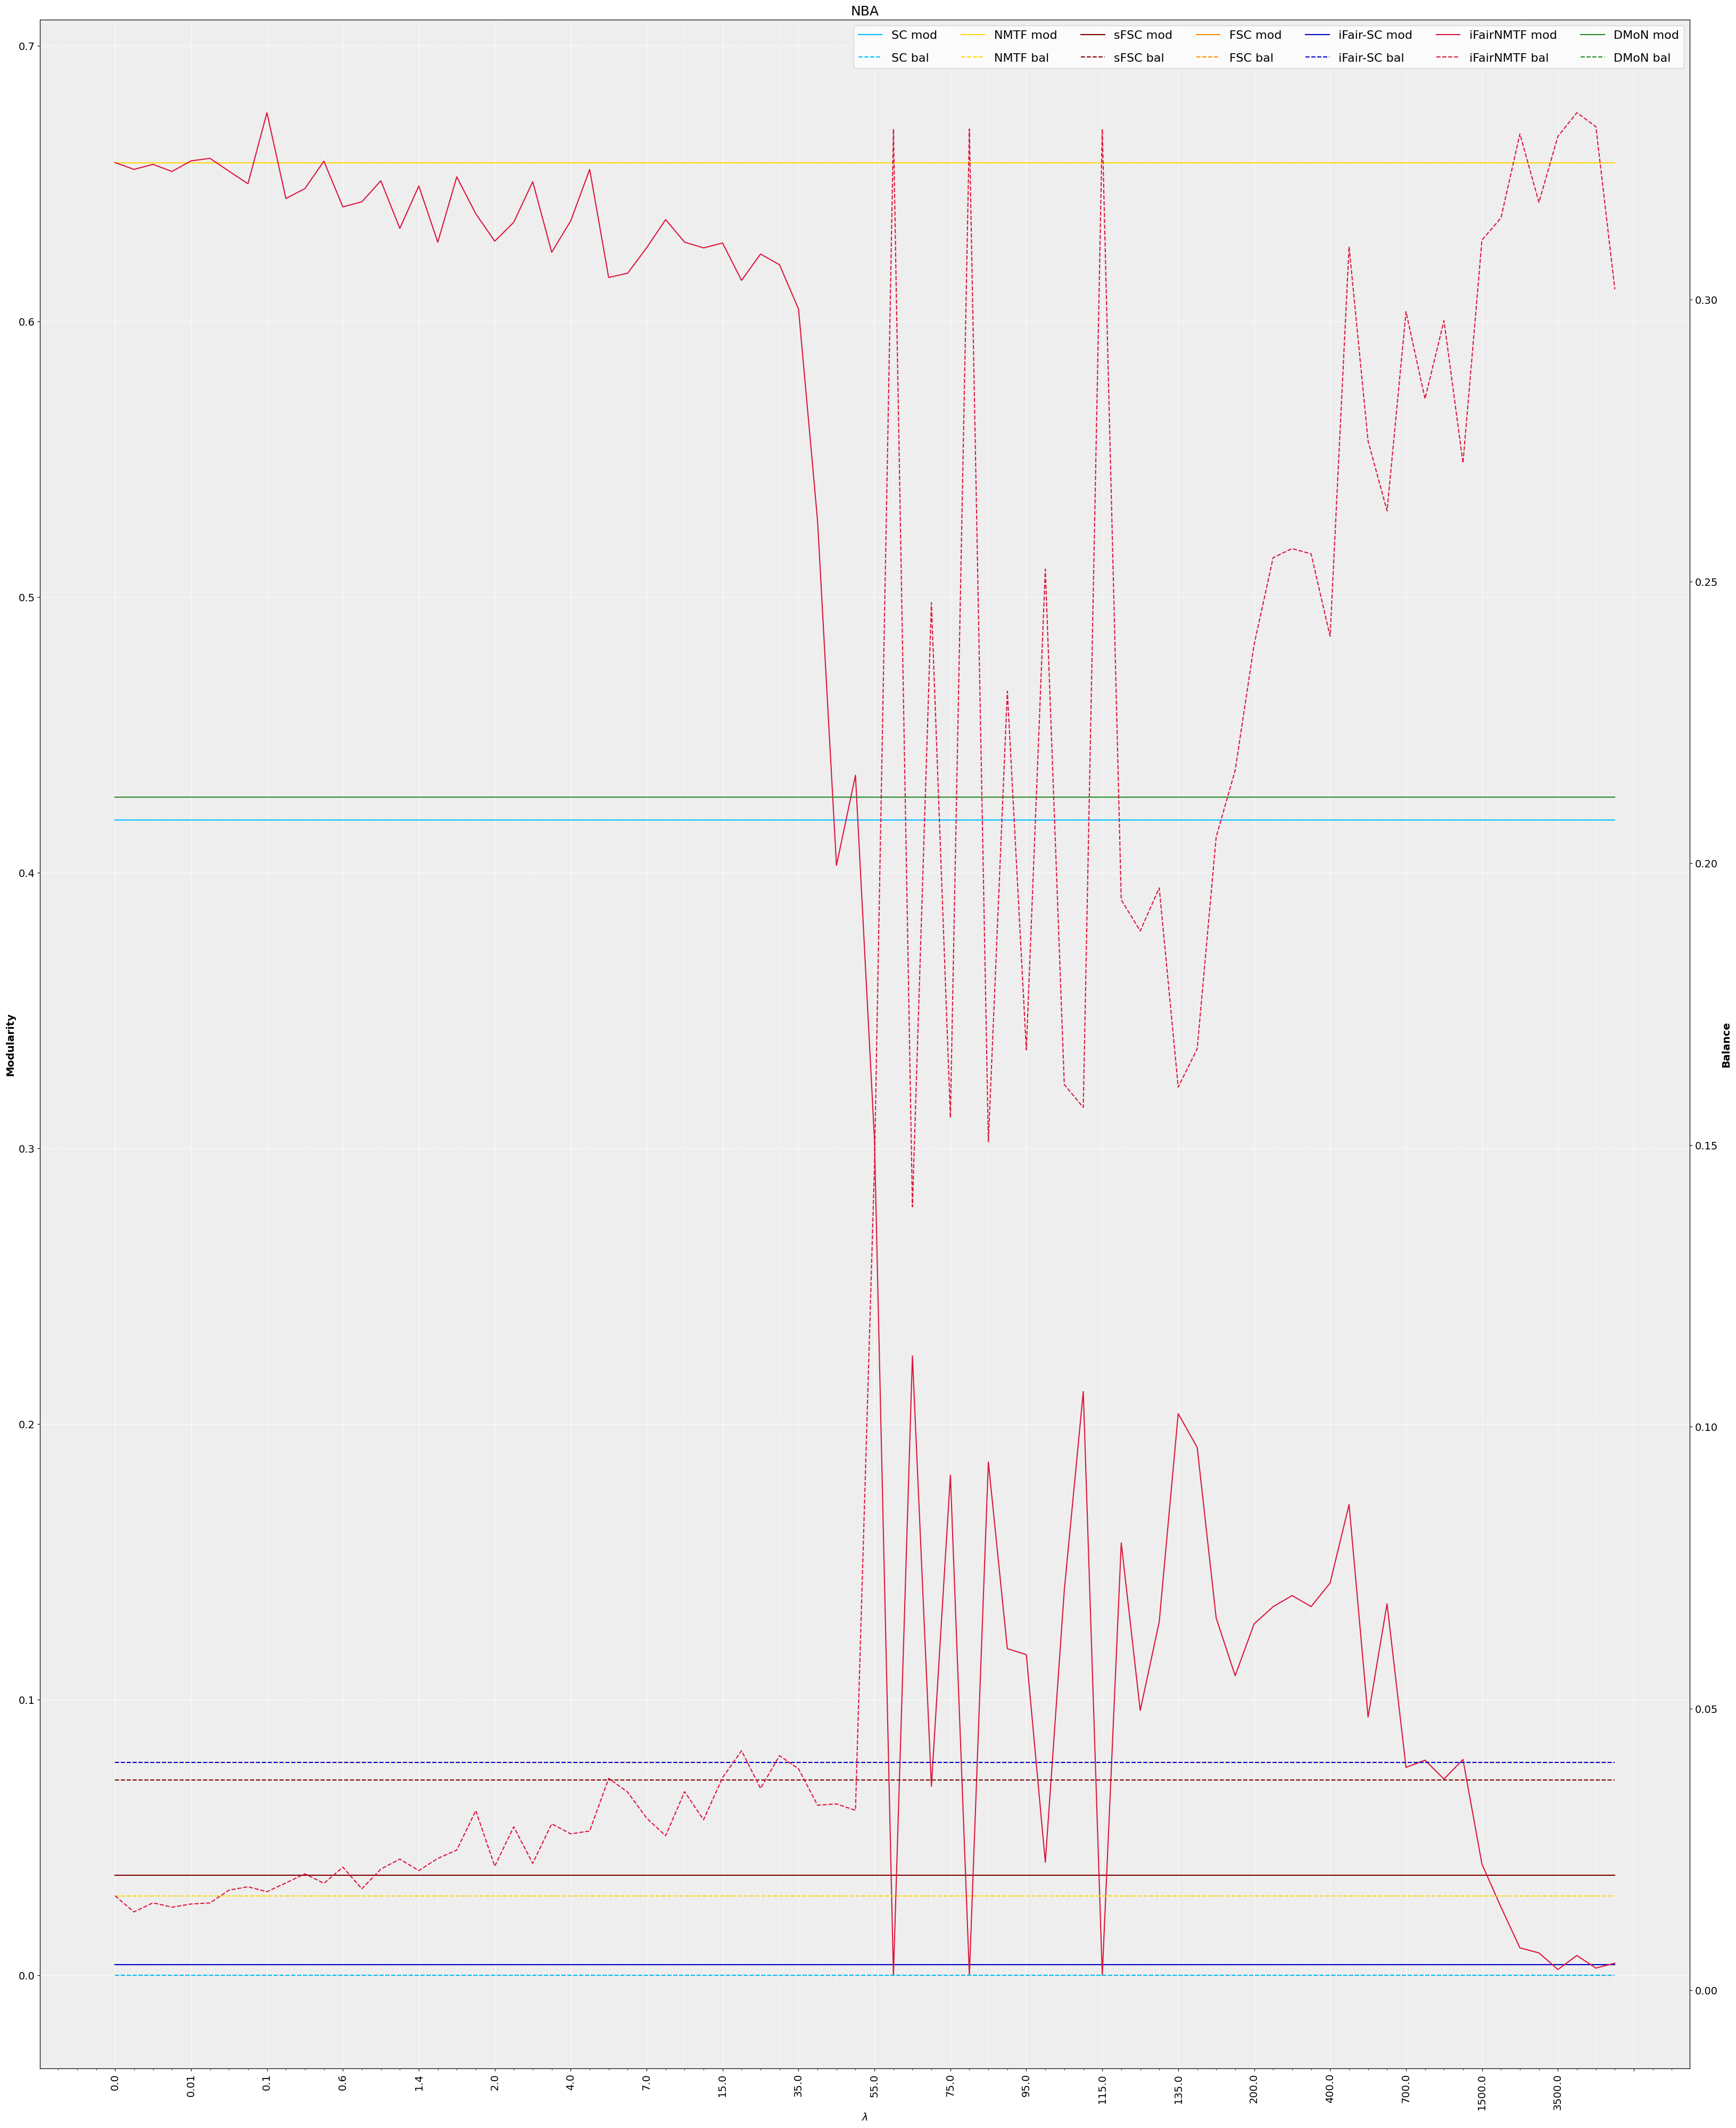

In [161]:
clusters = [2,5,8]

for ii, num_c in enumerate(clusters):
    if (num_c==5):
        ind = 3
    elif(num_c==2):
        ind = 0
    elif(num_c==8):
        ind = 6

    fnmf_mod = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['Q_FNMTF'].values
    fnmf_bal = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['B_FNMTF'].values
    nmf_m= fair_nmf.loc[(fair_nmf['lam'] == 0)]["Q_FNMTF"].values
    nmf_b = fair_nmf.loc[(fair_nmf['lam'] == 0)]["B_FNMTF"].values
    lam  = fair_nmf.loc[(fair_nmf['clusters (k)'] == num_c)]['lam'].values

    x = np.arange(0, len(lam), 1)
    tick_labs, ticks = [],[]
    for i in x:
        if (np.mod(i,4)==0):
            tick_labs.append(lam[i])
            ticks.append(i)

    figure, axis = plt.subplots(figsize=(40, 50))

    axis.set_facecolor('#EEEEEE') #EBEBEB

    sfsc_mod = np.repeat(g_sfsc_mod[ind], len(lam))
    sfsc_bal = np.repeat(g_sfsc_bal[ind], len(lam))
    fsc_mod = np.repeat(g_fsc_mod[ind], len(lam))
    fsc_bal = np.repeat(g_fsc_bal[ind], len(lam))
    ifsc_mod = np.repeat(i_ifsc_mod[ind], len(lam))
    ifsc_bal = np.repeat(i_ifsc_bal[ind], len(lam))
    dmon_mod = np.repeat(g_dmon_mod[ind], len(lam))
    dmon_bal = np.repeat(g_dmon_bal[ind], len(lam))
    nmf_mod = np.repeat(nmf_m[num_c-2], len(lam))
    nmf_bal = np.repeat(nmf_b[num_c-2], len(lam))
    sc_mod = np.repeat(g_sc_mod[ind], len(lam))
    sc_bal = np.repeat(g_sc_bal[ind], len(lam))

    # Style the grid.
    axis.grid(which='major', color='white', linewidth=0.6)
    axis.grid(which='minor', color='white', linewidth=0.3)
    axis.set_title(r"NBA", fontsize=18)
    #axis.set_title(r"LastFM-Net: $V_s$ = Country, $\lambda\in[0,10^2], k = $"+str(num_c), fontsize=18)
    axis.tick_params(axis='both', labelsize=14) #labelsize=14

    axis2=axis.twinx()

    p1 = axis.plot(x, sc_mod,   label='SC mod', markersize=7, linewidth=1.5, c = "deepskyblue")
    p2 = axis.plot(x, nmf_mod,  label='NMTF mod', markersize=7, linewidth=1.5, c = "gold")
    p3 = axis.plot(x, sfsc_mod,   label='sFSC mod', markersize=7, linewidth=1.5, c = "maroon")
    p4 = axis.plot(x, fsc_mod,  label='FSC mod', markersize=7, linewidth=1.5, c = "darkorange")
    p5 = axis.plot(x, ifsc_mod,  label='iFair-SC mod', markersize=7, linewidth=1.5, c = "mediumblue")
    p6 = axis.plot(x, fnmf_mod, label='iFairNMTF mod', markersize=7, linewidth=1.5, c = "crimson")
    p7 = axis.plot(x, dmon_mod,  label='DMoN mod', markersize=7, linewidth=1.5, c = "forestgreen")

    p8 = axis2.plot(x, sc_bal,  label='SC bal', markersize=7, linewidth=1.5, linestyle = "--", c = "deepskyblue")
    p9 = axis2.plot(x, nmf_bal, label='NMTF bal', markersize=7, linewidth=1.5, linestyle = "--", c = "gold")
    p10 = axis2.plot(x, sfsc_bal,  label='sFSC bal', markersize=7, linewidth=1.5, linestyle = "--", c = "maroon")
    p11 = axis2.plot(x, fsc_bal, label='FSC bal', markersize=7, linewidth=1.5, linestyle = "--", c = "darkorange")
    p12 = axis2.plot(x, ifsc_bal, label='iFair-SC bal', markersize=7, linewidth=1.5, linestyle = "--", c = "mediumblue")
    p13 = axis2.plot(x, fnmf_bal,label='iFairNMTF bal', markersize=7, linewidth=1.5, linestyle = "--", c = "crimson")
    p14 = axis.plot(x, dmon_bal,  label='DMoN bal', markersize=7, linewidth=1.5, linestyle = "--", c = "forestgreen")

    axis.set_xlabel(r"$\lambda$", fontsize = 14, fontweight='bold')
    axis.set_ylabel("Modularity", fontsize=14, fontweight='bold')
    axis2.set_ylabel("Balance",   fontsize=14, fontweight='bold')

    axis.set_xticks(ticks)
    axis.set_xticklabels(tick_labs, rotation=90, fontsize = 14)
    axis2.tick_params(labelsize=14)


    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    axis.xaxis.set_minor_locator(MultipleLocator(1))
    axis.xaxis.set_major_locator(MultipleLocator(4))

    # added these three lines for aggregated legend
    #plots = p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14
    plots = p1+p8+p2+p9+p3+p10+p4+p11+p5+p12+p6+p13+p7+p14
    labels = [l.get_label() for l in plots]

    axis.legend(plots, labels,  ncol=7, fontsize=16, labelspacing = 1)
    plt.savefig("legend_lambda_analysis_k_"+str(num_c)+".svg", format='svg')
    plt.show()

# Convergence charts 

In [188]:
from algorithms import *
from utils import *
from evaluations import *
import torch
import numpy as np
import matplotlib as mpl

eps = torch.tensor(0.000001)

## 1) NBA

In [194]:
path1 = "data/NBA/"
A0 = (pd.read_csv(path1 + "NBAgraph.csv", header=None)).to_numpy()
F = (pd.read_csv(path1 + "NBAfeature.csv", header=None)).to_numpy()

k = 5
lambdas = [1,100]

Adj = torch.tensor(A0, dtype=torch.float)
standard_groups = reflow_clusters(F.ravel())
groups = np.transpose(standard_groups)
L, Ln, Lp = joint_Laplacian(groups)

iter = 500
err_nba = torch.zeros((2,iter))
for idx,lam in enumerate(lambdas):

    # iFair_NMTF
    #H1, W1, err_nba[idx] = iFairNMTF(Adj, L, Ln, Lp, num_c, lam, iter)

    import copy
    A = copy.deepcopy(Adj)
    n = A.shape[0]
    H = torch.rand(n, k, dtype=torch.float)  # the membership degree matrix (H) initialization
    W = torch.rand(k, k, dtype=torch.float)
    #W = svd_init(A, k)

    for t in range(iter):
        Hn = (A.T @ H @ W + A @ H @ W.T + lam * (-Ln @ H))
        Hd = H @ W.T @ H.T @ H @ W + H @ W @ H.T @ H @ W.T + lam * ((Lp) @ H)#(RTR @ H)
        H = H * (Hn / torch.maximum(Hd, eps)) ** 0.25

        Wn = H.T @ A @ H
        Wd = H.T @ H @ W @ H.T @ H
        W = W * (Wn / torch.maximum(Wd, eps))

        err_nba[idx][t] = torch.norm(A - H @ W @ H.T) ** 2 + lam * torch.trace(H.T @ L @ H)

## 2) Drugnet

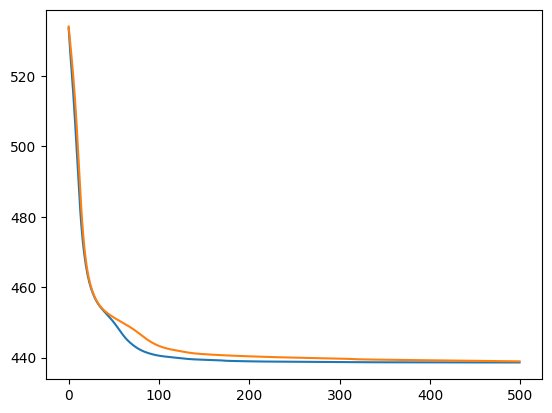

In [185]:
path1 = "data/DrugNet/"
path2 = "results/New/DrugNet/"

A = (pd.read_csv(path1 + "DrugNetgraph.csv", header=None)).to_numpy()
F = (pd.read_csv(path1 + "DrugNetfeature.csv", header=None)).to_numpy()

F_ethn = F[:,0]

k = 5
lambdas = [0.1,1]

Adj = torch.tensor(A, dtype=torch.float)
standard_groups = reflow_clusters(F_ethn.ravel())
groups = np.transpose(standard_groups)
L, Ln, Lp = joint_Laplacian(groups)

iter = 500
err_drug = torch.zeros((2,iter))
for idx,lam in enumerate(lambdas):

    # iFair_NMTF
    H1, W1, err_drug[idx] = iFairNMTF(Adj, L, Ln, Lp, num_c, lam, iter)

## 3) Diaries

In [202]:
path1 = "data/School/"
path2 = "results/New/School/"

A = (pd.read_csv(path1 + "diaries.csv", header=None)).to_numpy()
F = (pd.read_csv(path1 + "cd_attr.csv", header=None)).to_numpy()

k = 5
lambdas = [0,1]

Adj = torch.tensor(A, dtype=torch.float)
standard_groups = reflow_clusters(F.ravel())
groups = np.transpose(standard_groups)
L, Ln, Lp = joint_Laplacian(groups)

iter = 500
err_diaries = torch.zeros((2,iter))
for idx,lam in enumerate(lambdas):

    # iFair_NMTF
    H1, W1, err_diaries[idx] = iFairNMTF(Adj, L, Ln, Lp, num_c, lam, iter)

## 4) Facebook

In [207]:
path1 = "data/School/"
path2 = "results/New/School/"

A = (pd.read_csv(path1 + "friendship.csv", header=None)).to_numpy()
F = (pd.read_csv(path1 + "fr_attr.csv", header=None)).to_numpy()

k = 5
lambdas = [0,1]

Adj = torch.tensor(A, dtype=torch.float)
standard_groups = reflow_clusters(F.ravel())
groups = np.transpose(standard_groups)
L, Ln, Lp = joint_Laplacian(groups)

iter = 500
err_fb = torch.zeros((2,iter))
for idx,lam in enumerate(lambdas):

    # iFair_NMTF
    H1, W1, err_fb[idx] = iFairNMTF(Adj, L, Ln, Lp, num_c, lam, iter)

## 5) plot both

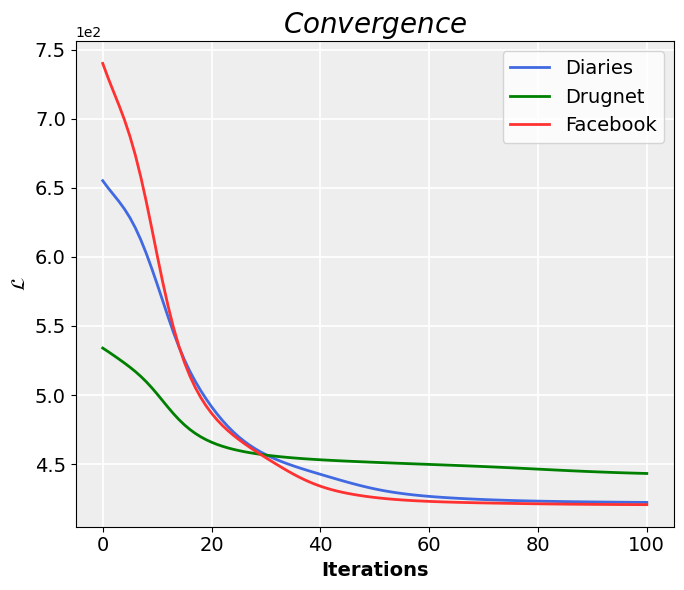

In [222]:
mpl.rcParams.update(mpl.rcParamsDefault)
figure, ax1 = plt.subplots(1, 1, figsize=(7, 6))

ax1.plot(np.arange(101), err_diaries[1,:101], label=r'Diaries', linewidth=2, c = "royalblue")
ax1.plot(np.arange(101), err_drug[1,:101], label=r'Drugnet', linewidth=2, c = "green")
ax1.plot(np.arange(101), err_fb[1,:101], label=r'Facebook', linewidth=2, c = "#FF3131")

#axis[i].set_xticks(k)
ax1.set_xlabel("Iterations", fontsize=14, fontweight='bold')

ax1.set_ylabel(r"$\mathcal{L}$", fontsize=14, fontweight='bold')

ax1.set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid. # Give plot a gray background like ggplot.
ax1.grid(which='major', color='white', linewidth=1.2)
ax1.grid(which='minor', color='white', linewidth=0.6)

ax1.tick_params(axis='both', labelsize=14)

#ax1.set_title("LastFM", fontsize=20)
#ax2.set_title("Facebook", fontsize=20)
ax1.set_title(r"$Convergence$", fontsize=20)


figure.tight_layout()
ax1.legend(loc="best", fontsize=14)

ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.savefig("convergence_100.svg", format='svg')
plt.show()

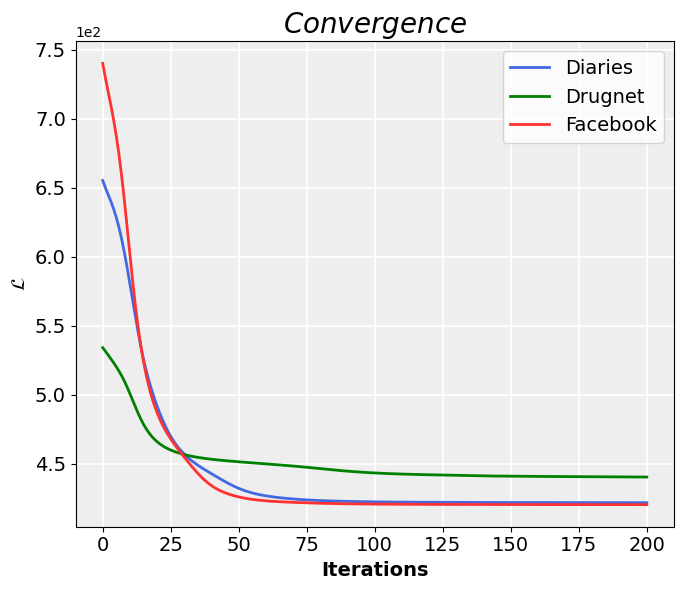

In [224]:
mpl.rcParams.update(mpl.rcParamsDefault)
figure, ax1 = plt.subplots(1, 1, figsize=(7, 6))

range = np.arange(201)

ax1.plot(range, err_diaries[1,:len(range)], label=r'Diaries', linewidth=2, c = "royalblue")
ax1.plot(range, err_drug[1,:len(range)], label=r'Drugnet', linewidth=2, c = "green")
ax1.plot(range, err_fb[1,:len(range)], label=r'Facebook', linewidth=2, c = "#FF3131")

#axis[i].set_xticks(k)
ax1.set_xlabel("Iterations", fontsize=14, fontweight='bold')

ax1.set_ylabel(r"$\mathcal{L}$", fontsize=14, fontweight='bold')

ax1.set_facecolor('#EEEEEE') #EBEBEB
    # Style the grid. # Give plot a gray background like ggplot.
ax1.grid(which='major', color='white', linewidth=1.2)
ax1.grid(which='minor', color='white', linewidth=0.6)

ax1.tick_params(axis='both', labelsize=14)

#ax1.set_title("LastFM", fontsize=20)
#ax2.set_title("Facebook", fontsize=20)
ax1.set_title(r"$Convergence$", fontsize=20)


figure.tight_layout()
ax1.legend(loc="best", fontsize=14)

ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.savefig("convergence_200.svg", format='svg')
plt.show()

In [440]:
mpl.rcParams.update(mpl.rcParamsDefault)

# 9) Synthetic
## Table $h=2, k=2$

In [534]:
path2 = "results/New/SBM/"
comp_sbm = pd.read_csv(path2 + "SBM_1_k_n_gridsearch.csv")
fnmf_1_sbm = pd.read_csv(path2 + "Fair_SymNMF_SBM_1_k_lam_gridsearch.csv")
fnmf_10_sbm = pd.read_csv(path2 + "FNMTF_SBM_10_k_lam_gridsearch.csv")

comp_perturb_sbm = pd.read_csv(path2 + "SBM_1_perturb_k_n_gridsearch.csv")
fnmf_1_perturb_sbm = pd.read_csv(path2 + "Fair_SymNMF_SBM_1_perturb_k_lam_gridsearch.csv")
fnmf_10_perturb_sbm = pd.read_csv(path2 + "Fair_SymNMF_SBM_10_perturb_k_lam_gridsearch.csv")

In [535]:
# SBM
fnmf_acc_1 = fnmf_1_sbm['accurcay'].values
fnmf_acc_10 = fnmf_10_sbm['accurcay'].values
fnmf_bal_1 = fnmf_1_sbm['average balance'].values
fnmf_bal_10 = fnmf_10_sbm['average balance'].values

fsc_acc_sbm = (comp_sbm.loc[comp_sbm['method'] == "fair_sc"]["accurcay"].values)
nmf_acc_sbm = (comp_sbm.loc[comp_sbm['method'] == "vanilla_nmf"]["accurcay"].values)
sc_acc_sbm = (comp_sbm.loc[comp_sbm['method'] == "vanilla_sc"]["accurcay"].values)

fsc_bal_sbm = (comp_sbm.loc[comp_sbm['method'] == "fair_sc"]["average balance"].values)
nmf_bal_sbm = (comp_sbm.loc[comp_sbm['method'] == "vanilla_nmf"]["average balance"].values)
sc_bal_sbm = (comp_sbm.loc[comp_sbm['method'] == "vanilla_sc"]["average balance"].values)


# SBM Perturb
fnmf_acc_1_p = fnmf_1_perturb_sbm['accurcay'].values
fnmf_acc_10_p = fnmf_10_perturb_sbm['accurcay'].values
fnmf_bal_1_p = fnmf_1_perturb_sbm['average balance'].values
fnmf_bal_10_p = fnmf_10_perturb_sbm['average balance'].values

fsc_acc_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "fair_sc"]["accurcay"].values)
nmf_acc_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "vanilla_nmf"]["accurcay"].values)
sc_acc_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "vanilla_sc"]["accurcay"].values)

fsc_bal_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "fair_sc"]["average balance"].values)
nmf_bal_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "vanilla_nmf"]["average balance"].values)
sc_bal_sbm_p = (comp_perturb_sbm.loc[comp_perturb_sbm['method'] == "vanilla_sc"]["average balance"].values)

In [536]:
col1 = ["SBM n=2k","SBM n=5k","SBM n=10k"]
col2 = ["SBM n=2k; p=0.3","SBM n=5k; p=0.3","SBM n=10k; p=0.3"]

results = dict()
results = {'Network':col1, r'$B$-SC':sc_bal_sbm, r'$Acc$-SC':sc_acc_sbm, r'$B$-FSC':fsc_bal_sbm, r'$Acc$-FSC':fsc_acc_sbm,
           r'$B$-SNMF':nmf_bal_sbm, r'$Acc$-SNMF':nmf_acc_sbm, r'$B$-FSNMF($\lambda = 1$)':fnmf_bal_1, 
           r'$Acc$-FSNMF($\lambda = 1$)':fnmf_acc_1, r'$B$-FSNMF($\lambda = 10$)':fnmf_bal_10, 
           r'$Acc$-FSNMF($\lambda = 10$)':fnmf_acc_10}


results_prtrb = dict()
results_prtrb = {'Network':col2, r'$B$-SC':sc_bal_sbm_p, r'$Acc$-SC':sc_acc_sbm_p, r'$B$-FSC':fsc_bal_sbm_p,
                 r'$Acc$-FSC':fsc_acc_sbm_p, r'$B$-SNMF':nmf_bal_sbm_p, r'$Acc$-SNMF':nmf_acc_sbm_p, 
                 r'$B$-FSNMF($\lambda = 1$)':fnmf_bal_1_p, r'$Acc$-FSNMF($\lambda = 1$)':fnmf_acc_1_p,
                 r'$B$-FSNMF($\lambda = 10$)':fnmf_bal_10_p, r'$Acc$-FSNMF($\lambda = 10$)':fnmf_acc_10_p}

df = pd.DataFrame((results))
df_prtrb = pd.DataFrame((results_prtrb))
display(df)
display(df_prtrb)

Network    $B$-SC  $Acc$-SC   $B$-FSC  $Acc$-FSC  $B$-SNMF  $Acc$-SNMF  \
0   SBM n=2k  0.066667    0.2030  0.466667     0.2045  0.104110      0.4070   
1   SBM n=5k  0.000000    0.2006  0.199840     0.2008  0.000000      0.4610   
2  SBM n=10k  0.000000    0.2002  0.199920     0.2003  0.011905      0.4321   

   $B$-FSNMF($\lambda = 1$)  $Acc$-FSNMF($\lambda = 1$)  \
0                  0.941416                      0.8190   
1                  0.978457                      0.8100   
2                  0.983079                      0.5537   

   $B$-FSNMF($\lambda = 10$)  $Acc$-FSNMF($\lambda = 10$)  
0                   0.900923                       0.3010  
1                   0.966282                       0.2294  
2                   0.953729                       0.2231

Network    $B$-SC  $Acc$-SC   $B$-FSC  $Acc$-FSC  $B$-SNMF  \
0   SBM n=2k; p=0.3  0.085551    0.2010  0.139940     0.2055  0.171692   
1   SBM n=5k; p=0.3  0.085600    0.2006  0.140112     0.2014  0.255113   
2  SBM n=10k; p=0.3  0.085763    0.2003  0.139948     0.2050  0.205340   

   $Acc$-SNMF  $B$-FSNMF($\lambda = 1$)  $Acc$-FSNMF($\lambda = 1$)  \
0      0.4455                  0.542340                      0.7065   
1      0.4486                  0.500191                      0.4970   
2      0.3803                  0.559850                      0.4273   

   $B$-FSNMF($\lambda = 10$)  $Acc$-FSNMF($\lambda = 10$)  
0                   0.431453                       0.2565  
1                   0.571885                       0.2352  
2                   0.539555                       0.2371

## Table $h=5, k=5$

In [133]:
path2 = "Results/Final/combined results/"

comp_sbm = pd.read_csv(path2 + "SBM_k_n_gridsearch.csv")
fnmf_sbm = pd.read_csv(path2 + "Fair_NMTF_SBM_k_lam_gridsearch1.csv")


# SBM
fnmf_acc = fnmf_sbm['accurcay'].values
fnmf_bal = fnmf_sbm['average balance'].values

fnmf_acc = fnmf_sbm.loc[(fnmf_sbm['lam'] == 1000)]["accurcay"].values
fnmf_bal = fnmf_sbm.loc[(fnmf_sbm['lam'] == 1000)]["average balance"].values

fsc_acc_sbm = (comp_sbm.loc[comp_sbm['method'] == "fair_sc"]["accurcay"].values)
sfsc_acc_sbm = (comp_sbm.loc[comp_sbm['method'] == "sfsc"]["accurcay"].values)
ifsc_acc_sbm  = (comp_sbm.loc[comp_sbm['method'] == "ifsc"]["accurcay"].values)
dmon_acc_sbm  = (comp_sbm.loc[comp_sbm['method'] == "dmon"]["accurcay"].values)

fsc_bal_sbm = (comp_sbm.loc[comp_sbm['method'] == "fair_sc"]["average balance"].values)
sfsc_bal_sbm = (comp_sbm.loc[comp_sbm['method'] == "sfsc"]["average balance"].values)
ifsc_bal_sbm  = (comp_sbm.loc[comp_sbm['method'] == "ifsc"]["average balance"].values)
dmon_bal_sbm  = (comp_sbm.loc[comp_sbm['method'] == "dmon"]["average balance"].values)


In [134]:
col1 = ["SBM n=2k","SBM n=5k","SBM n=10k"]
col2 = ["SBM n=2k; p=0.3","SBM n=5k; p=0.3","SBM n=10k; p=0.3"]

results = dict()
results = {'Network':col1, r'$B$-FSC':fsc_bal_sbm, r'$Acc$-FSC':fsc_acc_sbm, r'$B$-sFSC':sfsc_bal_sbm,
           r'$Acc$-sFSC':sfsc_acc_sbm, r'$B$-iFSC':ifsc_bal_sbm, r'$Acc$-iFSC':ifsc_acc_sbm,
           r'$B$-DMoN':dmon_bal_sbm, r'$Acc$-DMoN':dmon_acc_sbm, r'$B$-iFNMTF':fnmf_bal,
           r'$Acc$-iFNMTF':fnmf_acc}

df = pd.DataFrame((results))
display(df)

Network      $B$-FSC $Acc$-FSC $B$-sFSC $Acc$-sFSC $B$-iFSC   $Acc$-iFSC  \
0   SBM n=2k  0.575655476     0.588       na         na        0        0.799   
1   SBM n=5k  0.995009945    0.9984       na         na        0  0.799666667   
2  SBM n=10k  0.999999998         1       na         na        0  0.600033333   

  $B$-DMoN $Acc$-DMoN  $B$-iFNMTF  $Acc$-iFNMTF  
0       na         na    0.953207        0.9580  
1       na         na    0.941481        0.6922  
2       na         na    1.000000        1.0000

In [125]:
len(fnmf_acc)

0

In [509]:
fnmf_1_sbm['accurcay'].values

array([0.819 , 0.81  , 0.5537])

In [510]:
(comp_sbm.loc[comp_sbm['method'] == "fair_sc"]["accurcay"].values)

array([0.2025, 0.2004, 0.3974])

$1 - \frac{1}{n}\sum_{i=1}^n |\hat{y}_i -
           \frac{1}{\text{n_neighbors}} \sum_{j\in\mathcal{N}_{\text{n_neighbors}}(x_i)} \hat{y}_j|$

## $W$ matrix visualizations